<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">INDICATEURS ET CHIFFRES CLEFS</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [56]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.6 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.6 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.6 MB 3.4 MB/s eta 0:00:02
   ---------------------------- ----------- 6.8/9.6 MB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
%pip install scikit_posthocs

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat as nbf
import openpyxl as opx
import numpy as np
import re
import matplotlib.dates as mdates
import scipy.stats as stats

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
# Lit le fichier CSV et le charge dans un DataFrame
df_customers = pd.read_csv("Data/customers.csv", sep=';', encoding='utf-8')
df_products = pd.read_csv('Data/products.csv', encoding='utf-8', sep=';')
# Charger le fichier
df_transactions = pd.read_csv('Data/Transactions.csv', encoding='utf-8', sep=';')


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\89177410.py:5: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions = pd.read_csv('Data/Transactions.csv', encoding='utf-8', sep=';')


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [150]:
print("\nStatistiques descriptives :")
print(df_customers)


Statistiques descriptives :
     client_id sex  age pyramide
0       c_4410   f   54    50-59
1       c_7839   f   46    40-49
2       c_1699   f   37    30-39
3       c_5961   f   59    50-59
4       c_5320   m   78    70-79
...        ...  ..  ...      ...
8616    c_7920   m   65    60-69
8617    c_7403   f   51    50-59
8618    c_5119   m   47    40-49
8619    c_5643   f   53    50-59
8620      c_84   f   39    30-39

[8621 rows x 4 columns]


In [6]:
# Vérifier les valeurs manquantes
print(df_customers.isnull().sum())

# Vérifier les doublons
print(df_customers.duplicated().sum())


client_id    0
sex          0
birth        0
dtype: int64
0


In [7]:
#Choix de la date

# Convertir la colonne 'date' en format datetime
df_transactions['date'] = pd.to_datetime(df_transactions['date'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes dans 'date'
df_transactions = df_transactions.dropna(subset=['date'])
# Trouver la date la plus ancienne
date_plus_ancienne = df_transactions['date'].min()

# Trouver la date la plus récente
date_plus_recente = df_transactions['date'].max()

# Afficher la date la plus ancienne
print("La date la plus ancienne est :", date_plus_ancienne)

# Afficher la date la plus récente
print("La date la plus récente est :", date_plus_recente)

La date la plus ancienne est : 2021-03-01 00:01:07.843138
La date la plus récente est : 2023-02-28 23:58:30.792755


In [8]:
# Calculer l'âge en 2021
df_customers['age'] = 2021 - df_customers['birth']

# Supprimer la colonne 'birth' pour anonymiser
df_customers = df_customers.drop(columns=['birth'])

# Afficher les premières lignes pour vérifier
print(df_customers.head())

  client_id sex  age
0    c_4410   f   54
1    c_7839   f   46
2    c_1699   f   37
3    c_5961   f   59
4    c_5320   m   78


In [9]:
df_customers.describe()

,age
count,8621.000000
mean,42.724394
std,16.917958
min,17.000000
25%,29.000000
50%,42.000000
75%,55.000000
max,92.000000


# resumé de customers
+ 8621 lignes
+ pas de doublons
+ pas de valeurs manquantes
+ année de référence 2021 (dernière transaction = 01/03/2021)
+ remplacement de la colonne birth par colonne âge ( 2021 - birth )

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [10]:
print("\nStatistiques descriptives :")
print(df_products)


Statistiques descriptives :
     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3281    2_23  115.99      2
3282   0_146   17.14      0
3283   0_802   11.22      0
3284   1_140   38.56      1
3285  0_1920   25.16      0

[3286 rows x 3 columns]


In [11]:
# Vérifier les valeurs manquantes
print(df_products.isnull().sum())

# Vérifier les doublons
print(df_products.duplicated().sum())

id_prod    0
price      0
categ      0
dtype: int64
0


In [12]:
# Afficher les informations générales sur le DataFrame
print("\nInformations sur les données :")
print(df_products.info())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
print(df_products.describe(include='all'))


Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB
None

Statistiques descriptives :
       id_prod        price        categ
count     3286  3286.000000  3286.000000
unique    3286          NaN          NaN
top     0_1920          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.863597     0.370359
std        NaN    29.849786     0.615446
min        NaN     0.620000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.075000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000


# resumé de products
+ 3286 lignes
+ pas de doublons
+ pas de valeurs manquantes

In [156]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier transactions</h3>
</div>

In [13]:
# Afficher les premières lignes
print("Aperçu des données :")
print(df_transactions.head())

# Afficher les informations générales
print("\nInformations sur les données :")
print(df_transactions.info())

# Afficher les statistiques descriptives
print("\nStatistiques descriptives :")
print(df_transactions.describe(include='all'))


Aperçu des données :
  id_prod                       date session_id client_id
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.2+ MB
None

Statistiques descriptives :
       id_prod                           date session_id client_id
count   687534                         

In [14]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df_transactions.isnull().sum())

# Vérifier les doublons
print("\nNombre de doublons :", df_transactions.duplicated().sum())



Valeurs manquantes par colonne :
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Nombre de doublons : 0


In [159]:
df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848


In [15]:
#Optimiser le format de date
# Extraire l'année, le mois, le jour et l'heure
df_transactions['year'] = df_transactions['date'].dt.year
df_transactions['month'] = df_transactions['date'].dt.month
df_transactions['day'] = df_transactions['date'].dt.day

# Afficher les nouvelles colonnes
print("\nAperçu des données avec les nouvelles colonnes temporelles :")
print(df_transactions.head())


Aperçu des données avec les nouvelles colonnes temporelles :
  id_prod                       date session_id client_id  year  month  day
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329  2021      3    1
1  0_1390 2021-03-01 00:02:26.047414        s_2     c_664  2021      3    1
2  0_1352 2021-03-01 00:02:38.311413        s_3     c_580  2021      3    1
3  0_1458 2021-03-01 00:04:54.559692        s_4    c_7912  2021      3    1
4  0_1358 2021-03-01 00:05:18.801198        s_5    c_2033  2021      3    1


In [16]:
# Convertir les colonnes 'year', 'month' et 'day' en entiers 
df_transactions['year'] = df_transactions['year'].astype(int)
df_transactions['month'] = df_transactions['month'].astype(int)
df_transactions['day'] = df_transactions['day'].astype(int)

# Reconstruire la colonne 'date' à partir de 'year', 'month' et 'day'
df_transactions['date'] = pd.to_datetime(df_transactions[['year', 'month', 'day']])

# Supprimer les colonnes 'year', 'month' et 'day'
df_transactions = df_transactions.drop(columns=['year', 'month', 'day'])

df_transactions

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01,s_1,c_329
1,0_1390,2021-03-01,s_2,c_664
2,0_1352,2021-03-01,s_3,c_580
3,0_1458,2021-03-01,s_4,c_7912
4,0_1358,2021-03-01,s_5,c_2033
...,...,...,...,...
687529,1_508,2023-02-28,s_348444,c_3573
687530,2_37,2023-02-28,s_348445,c_50
687531,1_695,2023-02-28,s_348446,c_488
687532,0_1547,2023-02-28,s_348447,c_4848


In [17]:
#suppression de la colonne session
df_transactions = df_transactions.drop(columns=['session_id'])

In [163]:
print(df_transactions.info())


<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id_prod    687534 non-null  object        
 1   date       687534 non-null  datetime64[ns]
 2   client_id  687534 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 21.0+ MB
None


In [18]:
df_transactions.describe()

,date
count,687534
mean,2022-03-01 09:22:26.987930880
min,2021-03-01 00:00:00
25%,2021-09-10 00:00:00
50%,2022-02-27 00:00:00
75%,2022-08-28 00:00:00
max,2023-02-28 00:00:00


# resumé de products
+ 687534 lignes
+ pas de doublons
+ pas de valeurs manquantes
+ optimisation de la date au format yyyy/mm/dd
+ suppression de la colonne session_id


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier products et transactions</h3>
</div>

In [19]:
# Fusionner df_transactions et df_products sur la colonne 'id_prod'
df_web = pd.merge(df_transactions, df_products, on='id_prod', how='inner')

# Afficher un aperçu du DataFrame résultant
print("Aperçu de df_web :")
print(df_web.head())

Aperçu de df_web :
  id_prod       date client_id  price  categ
0  0_1259 2021-03-01     c_329  11.99      0
1  0_1390 2021-03-01     c_664  19.37      0
2  0_1352 2021-03-01     c_580   4.50      0
3  0_1458 2021-03-01    c_7912   6.55      0
4  0_1358 2021-03-01    c_2033  16.49      0


In [20]:
print("\nAperçu de df_web :")
print(df_web.head())
print("\nInformations sur df_web :")
print(df_web.info())



Aperçu de df_web :
  id_prod       date client_id  price  categ
0  0_1259 2021-03-01     c_329  11.99      0
1  0_1390 2021-03-01     c_664  19.37      0
2  0_1352 2021-03-01     c_580   4.50      0
3  0_1458 2021-03-01    c_7912   6.55      0
4  0_1358 2021-03-01    c_2033  16.49      0

Informations sur df_web :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id_prod    687534 non-null  object        
 1   date       687534 non-null  datetime64[ns]
 2   client_id  687534 non-null  object        
 3   price      687534 non-null  float64       
 4   categ      687534 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 26.2+ MB
None


In [167]:
df_web.describe()

,date,price,categ
count,687534,687534.000000,687534.000000
mean,2022-03-01 09:22:26.987930880,17.493918,0.448789
min,2021-03-01 00:00:00,0.620000,0.000000
25%,2021-09-10 00:00:00,8.990000,0.000000
50%,2022-02-27 00:00:00,13.990000,0.000000
75%,2022-08-28 00:00:00,19.080000,1.000000
max,2023-02-28 00:00:00,300.000000,2.000000
std,NaN,18.238337,0.594563


# resumé de def_web (jointure products_transactions)
+ 687534 lignes
+ 0 doublons
+ pas de valeurs manquantes

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction df_web et customers</h3>
</div>

In [21]:
# Fusionner df_web et df_customers sur la colonne 'client_id'
df_final = pd.merge(df_web, df_customers, on='client_id', how='inner')

# Afficher un aperçu du DataFrame résultant
print("Aperçu de df_complete :")
print(df_final.head())

Aperçu de df_complete :
  id_prod       date client_id  price  categ sex  age
0  0_1259 2021-03-01     c_329  11.99      0   f   54
1  0_1390 2021-03-01     c_664  19.37      0   m   61
2  0_1352 2021-03-01     c_580   4.50      0   m   33
3  0_1458 2021-03-01    c_7912   6.55      0   f   32
4  0_1358 2021-03-01    c_2033  16.49      0   f   65


In [22]:
print(f"\nNombre de lignes dans df_final : {len(df_final)}")


Nombre de lignes dans df_final : 687534


In [23]:
# Vérifier les doublons
nombre_doublons = df_final.duplicated().sum()
print(f"\nNombre de doublons dans df_complete : {nombre_doublons}")

# Vérifier les valeurs manquantes
valeurs_manquantes = df_final.isnull().sum()
print("\nValeurs manquantes dans df_complete :")
print(valeurs_manquantes)


Nombre de doublons dans df_complete : 1626

Valeurs manquantes dans df_complete :
id_prod      0
date         0
client_id    0
price        0
categ        0
sex          0
age          0
dtype: int64


In [24]:
# Supprimer tous les doublons 
df_final = df_final.drop_duplicates()

# Vérifier le nombre de doublons après suppression
nombre_doublons_apres_suppression = df_final.duplicated().sum()
print(f"\nNombre de doublons après suppression : {nombre_doublons_apres_suppression}")




Nombre de doublons après suppression : 0


In [172]:
df_final

,id_prod,date,client_id,price,categ,sex,age
0,0_1259,2021-03-01,c_329,11.99,0,f,54
1,0_1390,2021-03-01,c_664,19.37,0,m,61
2,0_1352,2021-03-01,c_580,4.50,0,m,33
3,0_1458,2021-03-01,c_7912,6.55,0,f,32
4,0_1358,2021-03-01,c_2033,16.49,0,f,65
...,...,...,...,...,...,...,...
687529,1_508,2023-02-28,c_3573,21.92,1,f,25
687530,2_37,2023-02-28,c_50,48.99,2,f,27
687531,1_695,2023-02-28,c_488,26.99,1,f,36
687532,0_1547,2023-02-28,c_4848,8.99,0,m,68


# resumé de def_final
+ 1626 doublons
+ 685908 lignes restantes
 + pas de valeurs manquantes


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Evolution du chiffre d'affaire quotidien</h3>
</div>

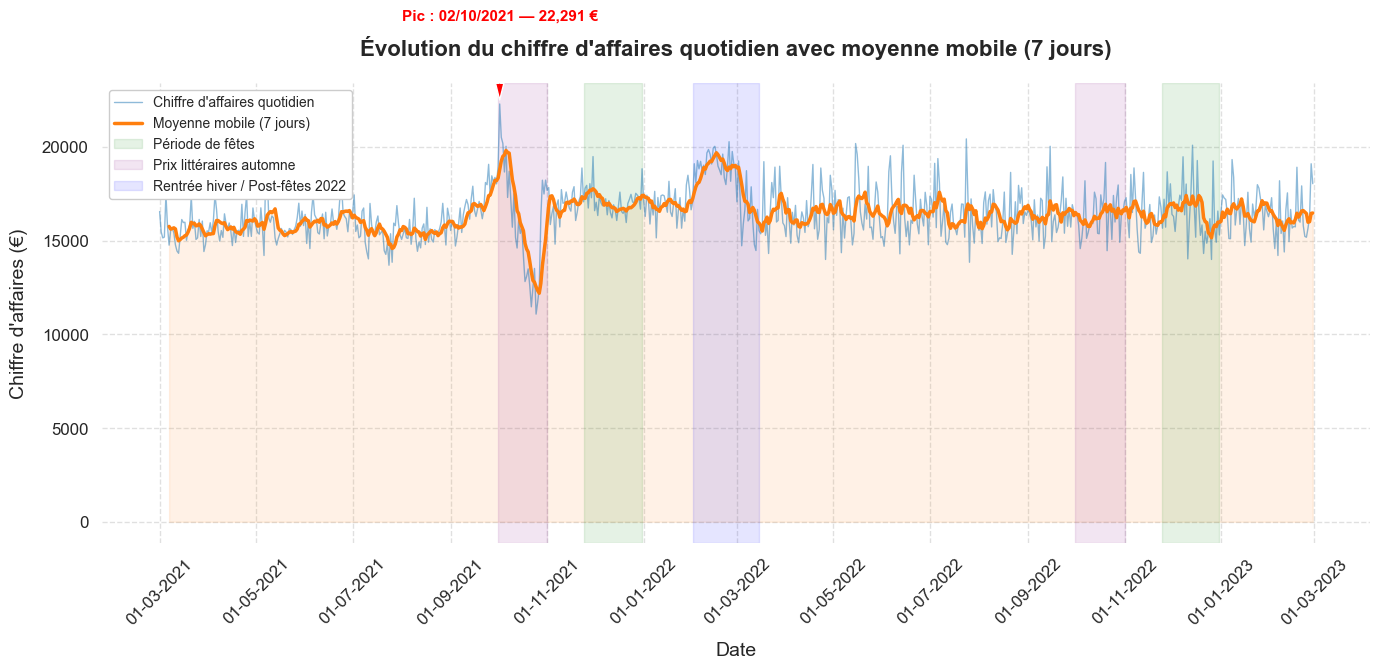

In [173]:
df_final['revenue'] = df_final['price']

# Configuration du style Seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(14, 7))

# Calcul du chiffre d'affaires quotidien
daily_revenue = df_final.groupby(df_final['date'].dt.date)['revenue'].sum().reset_index()

# Calcul de la moyenne mobile sur 7 jours
daily_revenue['moving_avg'] = daily_revenue['revenue'].rolling(window=7).mean()

# Création du graphique
plt.plot(daily_revenue['date'], daily_revenue['revenue'], label='Chiffre d\'affaires quotidien', color='#1f77b4', alpha=0.5, linewidth=1)
sns.lineplot(data=daily_revenue, x='date', y='moving_avg', label='Moyenne mobile (7 jours)', color='#ff7f0e', linewidth=2.5)

# Personnalisation du graphique
plt.title('Évolution du chiffre d\'affaires quotidien avec moyenne mobile (7 jours)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)
plt.legend(fontsize=12, frameon=True, framealpha=1)

# Formater l'axe des dates pour une meilleure lisibilité
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Ajouter une grille légère
plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.6)

# Remplir la zone sous la courbe de la moyenne mobile
plt.fill_between(daily_revenue['date'], daily_revenue['moving_avg'], color='#ff7f0e', alpha=0.1)

# Calcul du CA quotidien total (toutes catégories confondues)
daily_total = df_final.groupby('date')['revenue'].sum().reset_index()

# Trouver l'index du pic
max_idx = daily_total['revenue'].idxmax()
peak_date = daily_total.loc[max_idx, 'date']
peak_value = daily_total.loc[max_idx, 'revenue']

plt.annotate(
    f"Pic : {peak_date.strftime('%d/%m/%Y')} — {peak_value:,.0f} €",
    xy=(peak_date, peak_value),
    xytext=(peak_date, peak_value + peak_value*0.2),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=6),
    fontsize=11, color='red', fontweight='bold',
    ha='center'
)


# Ajouter un fond coloré pour les zones spécifiques
plt.axvspan('2021-11-24', '2021-12-31', color='green', alpha=0.1, label='Période de fêtes')
plt.axvspan('2022-11-25', '2022-12-31', color='green', alpha=0.1, label='_nolegend_')


# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Marquer la période des grands prix littéraires (octobre 2021)
plt.axvspan('2021-10-01', '2021-11-01',
            color='purple', alpha=0.1, label='Prix littéraires automne')

# Période des grands prix littéraires (octobre 2022)
plt.axvspan('2022-10-01', '2022-11-01',
            color='purple', alpha=0.1, label='_nolegend_')

# Période rentrée littéraire d'hiver + post-fêtes 2022
plt.axvspan('2022-02-01', '2022-03-15',
            color='blue', alpha=0.1, label='Rentrée hiver / Post-fêtes 2022')

# Ajouter une légende et un titre élégant
plt.legend(frameon=True, framealpha=1, fontsize=10, loc='upper left')


# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Evolution du chiffre d'affaire quotidien par catégories</h3>
</div>

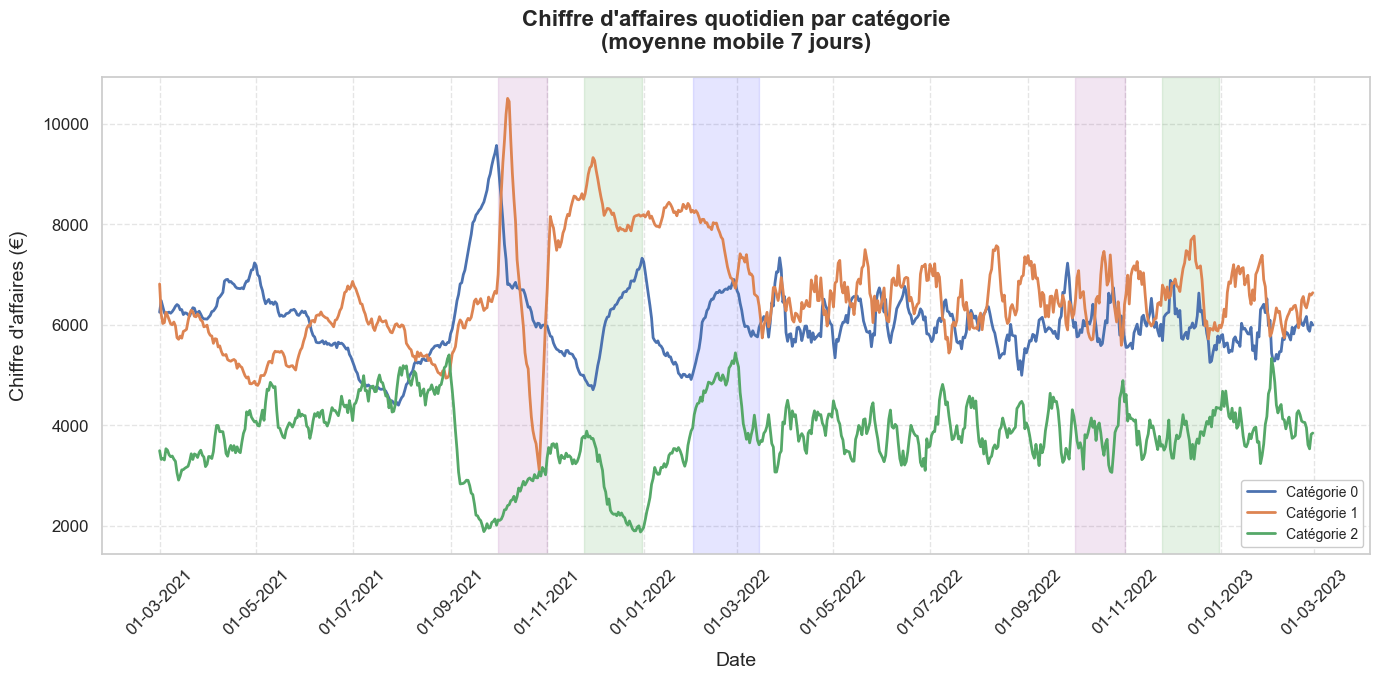

In [174]:
# Configuration du style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 7))

# Assurer que 'date' est bien de type datetime
df_final['date'] = pd.to_datetime(df_final['date'])

# Grouper par date et catégorie
daily_categ = (
    df_final
    .groupby([df_final['date'].dt.date, 'categ'])['revenue']
    .sum()
    .reset_index()
)

# Calcul de la moyenne mobile 7 jours par catégorie
daily_categ['moving_avg'] = (
    daily_categ
    .groupby('categ')['revenue']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)

# Création du graphique : une courbe par catégorie
for categ, data in daily_categ.groupby('categ'):
    plt.plot(data['date'], data['moving_avg'], label=f"Catégorie {categ}", linewidth=2)

# Personnalisation du graphique
plt.title("Chiffre d'affaires quotidien par catégorie\n(moyenne mobile 7 jours)", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Chiffre d'affaires (€)", fontsize=14, labelpad=10)
plt.xticks(rotation=45)

# Formatage de l’axe des dates
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Ajout de la grille
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Légende propre et position en bas à droite
plt.legend(loc='lower right', frameon=True, framealpha=1, fontsize=10)

# Ajouter un fond coloré pour les zones spécifiques
plt.axvspan('2021-11-24', '2021-12-31', color='green', alpha=0.1, label='Période de fêtes')
plt.axvspan('2022-11-25', '2022-12-31', color='green', alpha=0.1, label='_nolegend_')

# Marquer la période des grands prix littéraires (octobre 2021)
plt.axvspan('2021-10-01', '2021-11-01',
            color='purple', alpha=0.1, label='Prix littéraires automne')

# Période des grands prix littéraires (octobre 2022)
plt.axvspan('2022-10-01', '2022-11-01',
            color='purple', alpha=0.1, label='_nolegend_')

# Période rentrée littéraire d'hiver + post-fêtes 2022
plt.axvspan('2022-02-01', '2022-03-15',
            color='blue', alpha=0.1, label='Rentrée hiver / Post-fêtes 2022')


plt.tight_layout()
plt.show()



C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\1998836324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


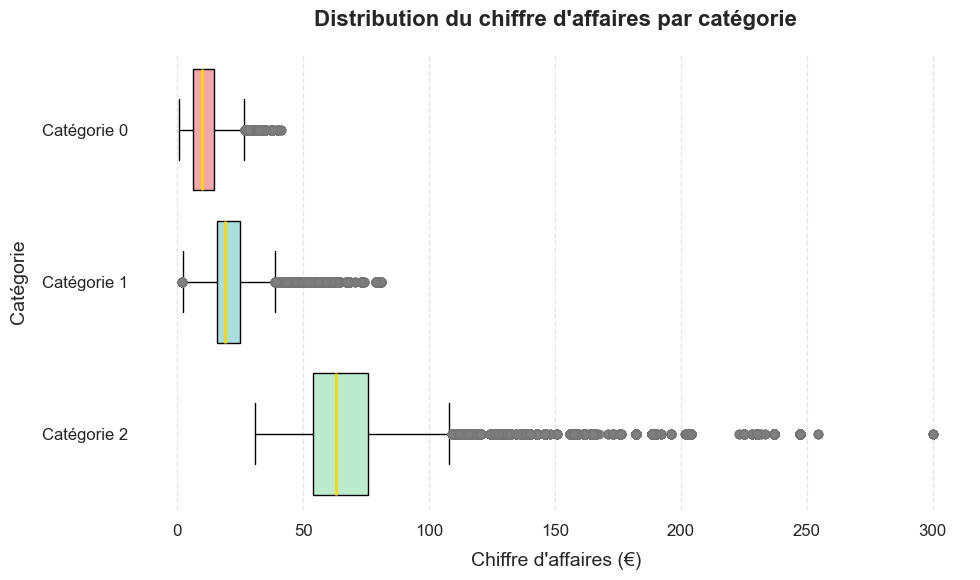

In [175]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Création du boxplot horizontal par catégorie
ax = sns.boxplot(
    data=df_final,
    y='categ',
    x='revenue',
    orient='h',
    palette=["#FF9AA2", "#A0E7E5", "#B5F1CC"],
    showfliers=True,
    flierprops=dict(marker="o", markersize=6, markerfacecolor="gray", alpha=0.5),
    boxprops=dict(edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="gold", linewidth=2)
)

# Personnalisation du graphique
plt.title('Distribution du chiffre d\'affaires par catégorie', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)
plt.ylabel('Catégorie', fontsize=14, labelpad=10)

# Remplacer les valeurs de l'axe Y par "Catégorie 0", "Catégorie 1", etc.
plt.yticks([0, 1, 2], [f'Catégorie {c}' for c in sorted(df_final['categ'].unique())], fontsize=12)

# Formater l'axe X avec des espaces comme séparateurs de milliers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

# Ajouter une grille verticale légère
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Ajouter un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.3 - Chiffre d'affaires par catégories</h3>
</div>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\232281322.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


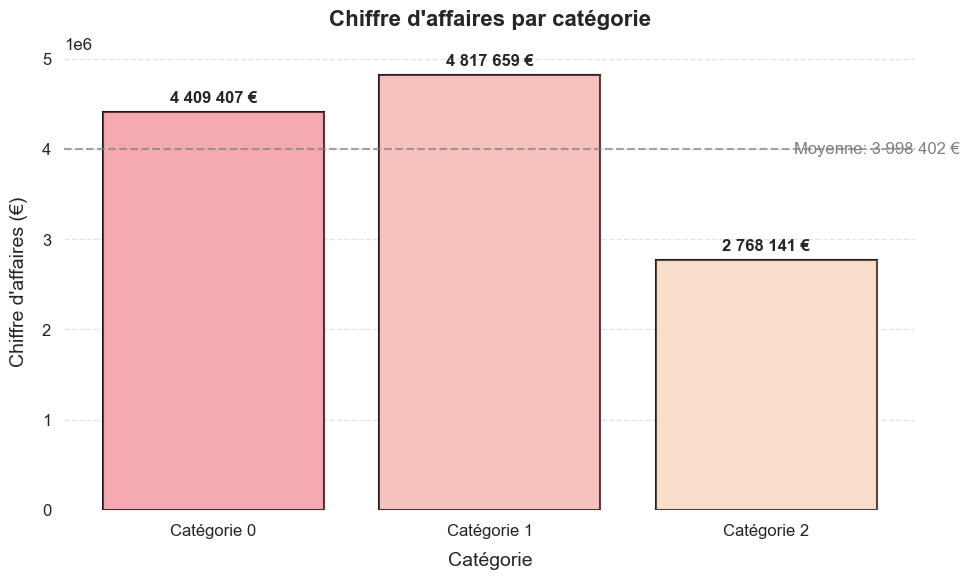

Total du chiffre d'affaires : 11 995 207 €


In [176]:
# Configuration du style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Calcul du chiffre d'affaires par catégorie
categ_revenue = df_final.groupby('categ')['revenue'].sum().reset_index()

# Palette de couleurs personnalisée
colors = ["#FF9AA2", "#FFB7B2", "#FFDAC1"]

# Création du graphique en barres
ax = sns.barplot(
    data=categ_revenue,
    x='categ',
    y='revenue',
    palette=colors,
    edgecolor="black",
    linewidth=1.5,
    alpha=0.9
)

# Ajouter des valeurs sur les barres avec des espaces comme séparateurs
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}".replace(",", " ") + " €",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

# Personnalisation du graphique
plt.title('Chiffre d\'affaires par catégorie', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Catégorie', fontsize=14, labelpad=10)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)

# Utiliser les valeurs de 'categ' comme noms de catégories
plt.xticks([0, 1, 2], [f'Catégorie {c}' for c in categ_revenue['categ']], fontsize=12)
plt.yticks(fontsize=12)

# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajouter un fond dégradé subtil
for i, patch in enumerate(ax.patches):
    plt.fill_between(
        [patch.get_x(), patch.get_x() + patch.get_width()],
        0,
        patch.get_height(),
        color=colors[i],
        alpha=0.2
    )

# Ajouter une grille horizontale légère
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ajouter une ligne de référence pour la moyenne avec des espaces
mean_revenue = categ_revenue['revenue'].mean()
plt.axhline(mean_revenue, color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
plt.text(2.1, mean_revenue, f"Moyenne: {mean_revenue:,.0f}".replace(",", " ") + " €", va='center', fontsize=12, color='gray')

# Afficher le graphique
plt.tight_layout()
plt.show()

# Calculer le total du chiffre d'affaires
total_revenue = df_final['revenue'].sum()

# Afficher le résultat avec des espaces comme séparateurs de milliers
print(f"Total du chiffre d'affaires : {total_revenue:,.0f}".replace(",", " ") + " €")




<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.4 - Nombre de clients uniques par mois</h3>
</div>

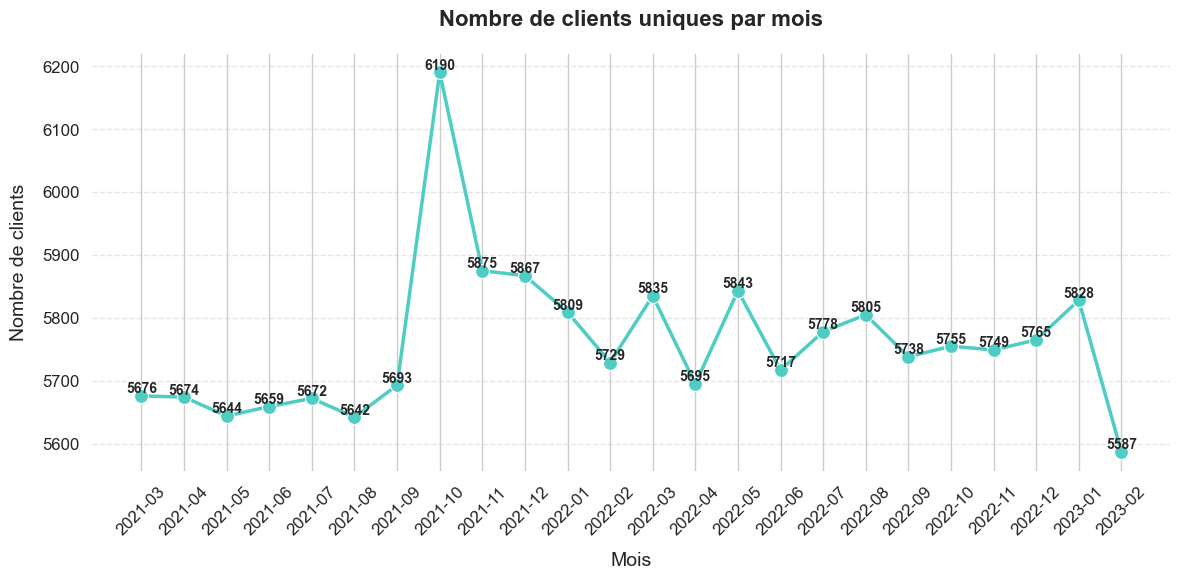

In [177]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Calcul du nombre de clients uniques par mois
monthly_customers = df_final.groupby(df_final['date'].dt.to_period('M'))['client_id'].nunique().reset_index()
monthly_customers['date'] = monthly_customers['date'].astype(str)

# Création du graphique
sns.lineplot(
    data=monthly_customers,
    x='date',
    y='client_id',
    marker='o',
    color='#4ECDC4',
    linewidth=2.5,
    markersize=10
)

# Personnalisation du graphique
plt.title('Nombre de clients uniques par mois', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Mois', fontsize=14, labelpad=10)
plt.ylabel('Nombre de clients', fontsize=14, labelpad=10)
plt.xticks(rotation=45)

# Ajouter une grille horizontale légère
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ajouter des annotations pour les valeurs
for x, y in zip(monthly_customers['date'], monthly_customers['client_id']):
    plt.text(x, y, f"{y}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajouter un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.5 - Nombre de transactions par mois</h3>
</div>

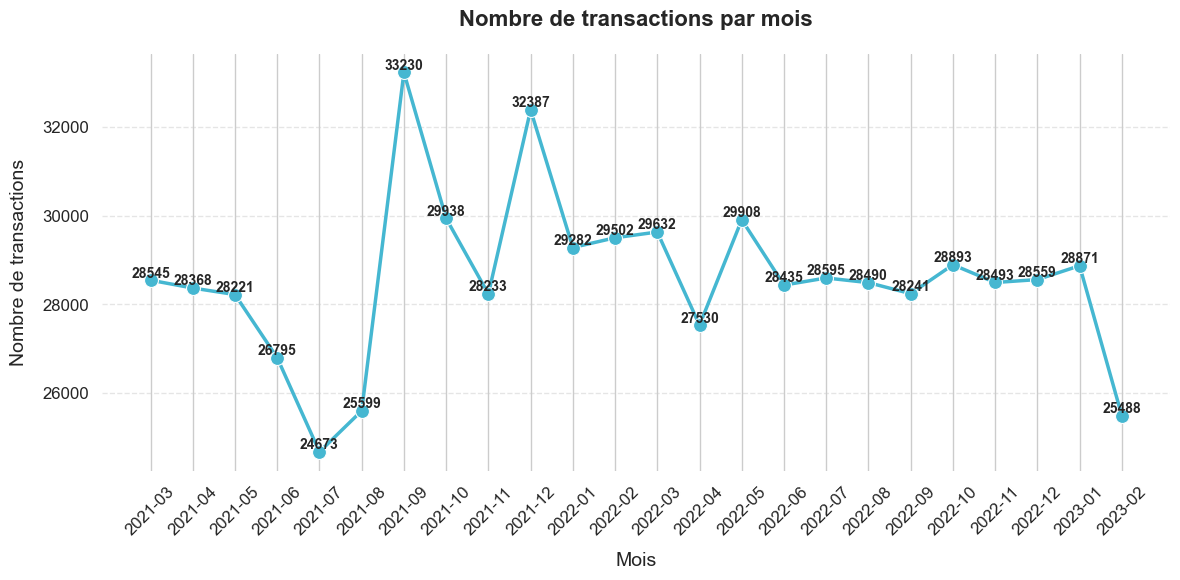

Nombre total de transactions : 685 908


In [178]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Calcul du nombre de transactions par mois
monthly_transactions = df_final.groupby(df_final['date'].dt.to_period('M')).size().reset_index()
monthly_transactions['date'] = monthly_transactions['date'].astype(str)

# Création du graphique
sns.lineplot(
    data=monthly_transactions,
    x='date',
    y=0,
    marker='o',
    color='#45B7D1',
    linewidth=2.5,
    markersize=10
)

# Personnalisation du graphique
plt.title('Nombre de transactions par mois', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Mois', fontsize=14, labelpad=10)
plt.ylabel('Nombre de transactions', fontsize=14, labelpad=10)
plt.xticks(rotation=45)

# Ajouter une grille horizontale légère
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ajouter des annotations pour les valeurs
for x, y in zip(monthly_transactions['date'], monthly_transactions[0]):
    plt.text(x, y, f"{y}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajouter un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher le nombre total de transactions
total_transactions = len(df_final)
print(f"Nombre total de transactions : {total_transactions:,}".replace(",", " "))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.6 - Nombre de produits vendus par catégories</h3>
</div>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\1474116658.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


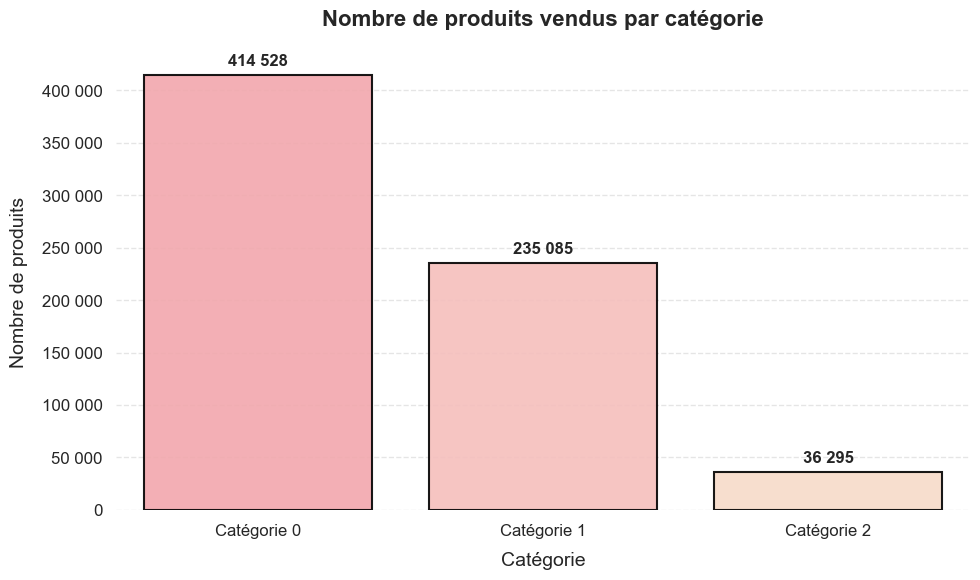

Nombre total de produits vendus : 685 908


In [179]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Calcul du nombre de produits vendus par catégorie
products_sold_by_categ = df_final.groupby('categ')['id_prod'].count().reset_index()

# Palette de couleurs personnalisée
colors = ["#FF9AA2", "#FFB7B2", "#FFDAC1"]

# Création du graphique en barres
ax = sns.barplot(
    data=products_sold_by_categ,
    x='categ',
    y='id_prod',
    palette=colors,
    edgecolor="black",
    linewidth=1.5,
    alpha=0.9
)

# Ajouter des valeurs sur les barres avec un espace comme séparateur de milliers
for p in ax.patches:
    height = p.get_height()
    formatted_value = f"{height:,.0f}".replace(",", " ")
    ax.annotate(
        formatted_value,
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

# Personnalisation du graphique
plt.title('Nombre de produits vendus par catégorie', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Catégorie', fontsize=14, labelpad=10)
plt.ylabel('Nombre de produits', fontsize=14, labelpad=10)

# Utiliser les valeurs de 'categ' comme noms de catégories
plt.xticks([0, 1, 2], [f'Catégorie {c}' for c in products_sold_by_categ['categ']], fontsize=12)

# Formater l'axe Y avec des espaces comme séparateurs de milliers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajouter une grille horizontale légère
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher le nombre total de produits vendus
total_products_sold = df_final['id_prod'].count()
print(f"Nombre total de produits vendus : {total_products_sold:,}".replace(",", " "))

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.6 - Top 10 des produits les plus vendus</h3>
</div>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2123629638.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


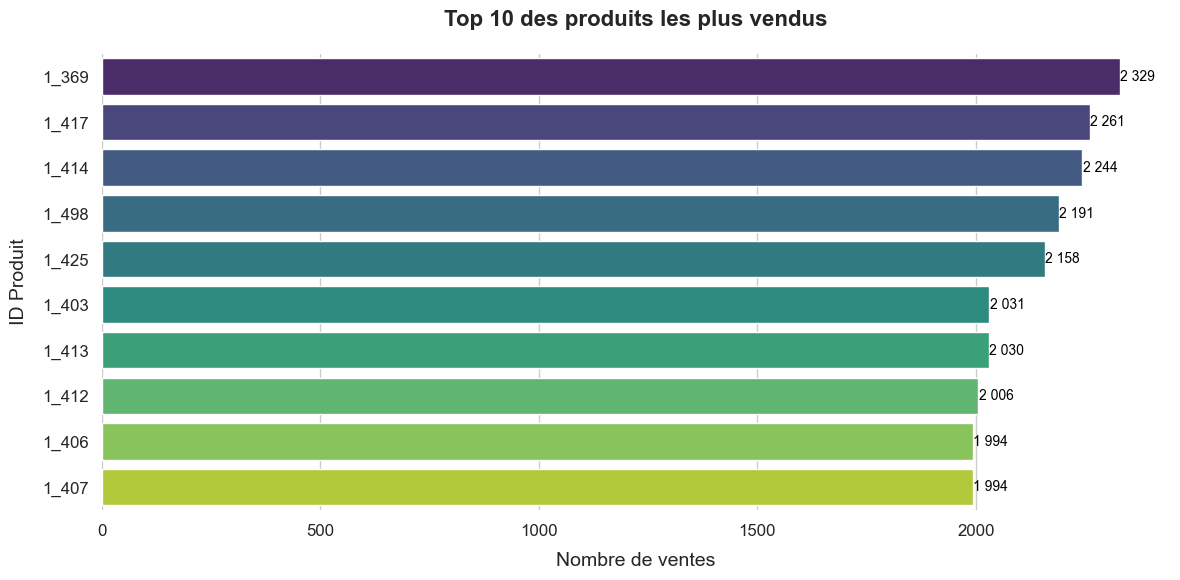

In [180]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Top 10 des produits les plus vendus
top_products = df_final['id_prod'].value_counts().head(10)

# Création du graphique en barres horizontales
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette="viridis"
)

# Personnalisation du graphique
plt.title('Top 10 des produits les plus vendus', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Nombre de ventes', fontsize=14, labelpad=10)
plt.ylabel('ID Produit', fontsize=14, labelpad=10)

# Ajouter des valeurs sur les barres
for i, v in enumerate(top_products.values):
    plt.text(v + 0.5, i, f"{v:,}".replace(",", " "), color='black', ha='left', va='center', fontsize=10)

# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

Top 3 des catégories les plus vendues : [0, 1, 2]


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2901251276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


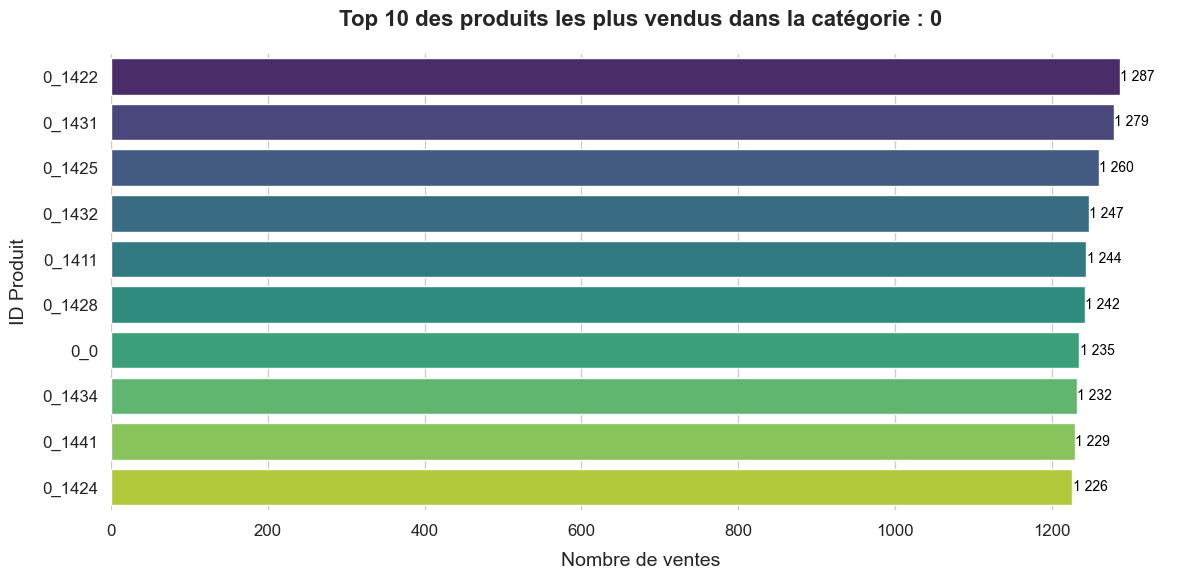

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2901251276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


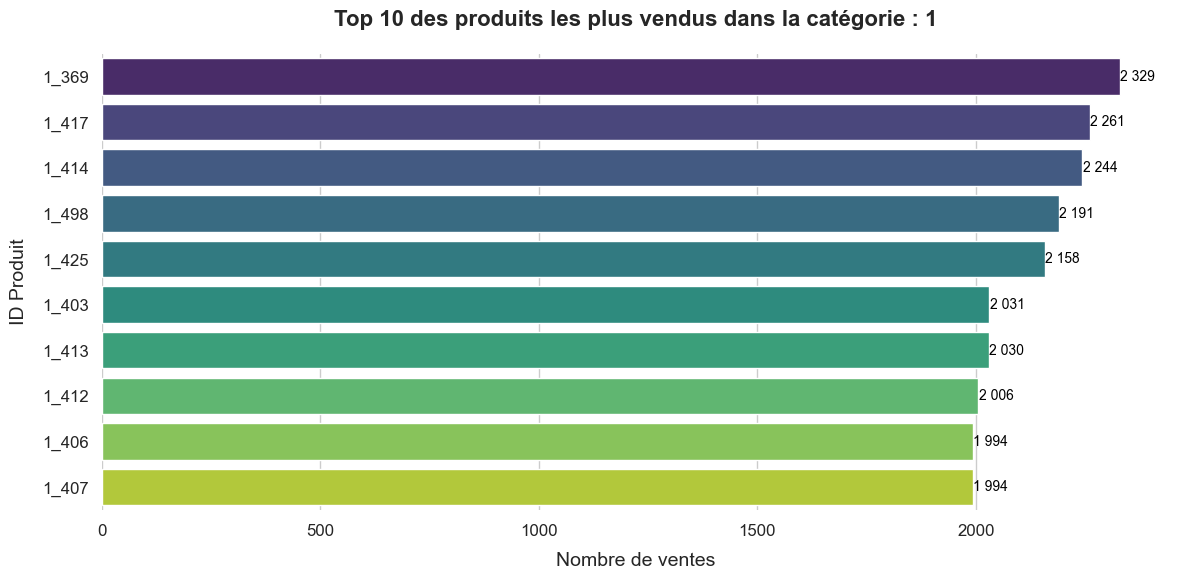

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2901251276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


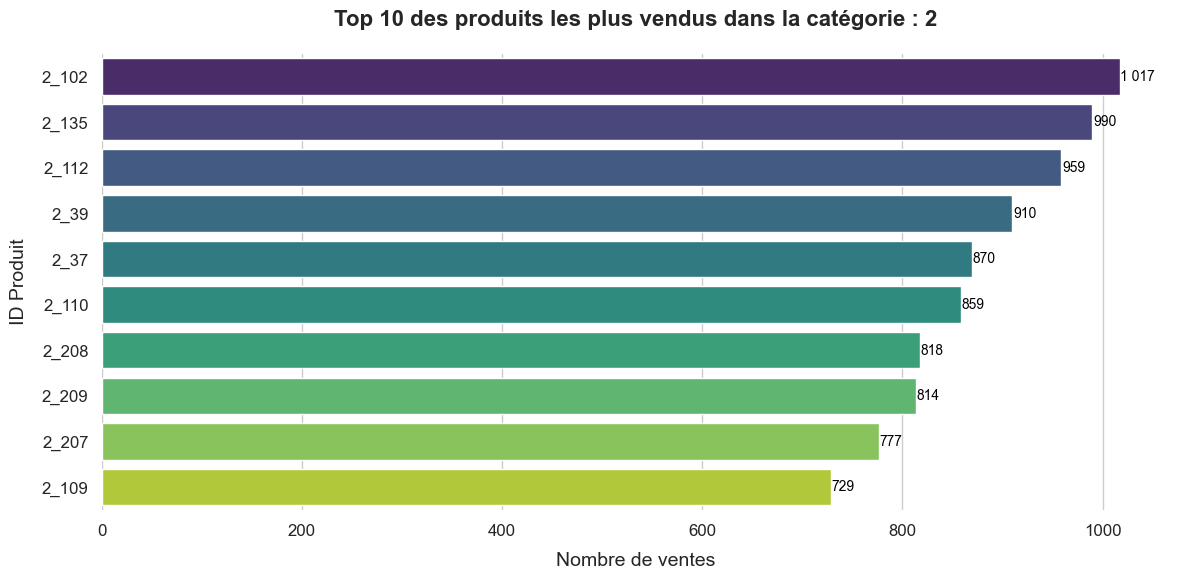

In [219]:
# Compter le nombre de ventes par catégorie
top_categories = df_final['categ'].value_counts().head(3).index
print("Top 3 des catégories les plus vendues :", top_categories.tolist())

def plot_top_products_by_category(category):
    # Filtrer les données pour la catégorie spécifiée
    category_data = df_final[df_final['categ'] == category]

    # Calculer le top 10 des produits les plus vendus dans cette catégorie
    top_products = category_data['id_prod'].value_counts().head(10)

    # Configuration du style
    plt.figure(figsize=(12, 6))

    # Création du graphique en barres horizontales
    sns.barplot(
        x=top_products.values,
        y=top_products.index.astype(str),  # Convertir en chaîne pour éviter les erreurs
        palette="viridis"
    )

    # Personnalisation du graphique
    plt.title(f'Top 10 des produits les plus vendus dans la catégorie : {category}', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Nombre de ventes', fontsize=14, labelpad=10)
    plt.ylabel('ID Produit', fontsize=14, labelpad=10)

    # Ajouter des valeurs sur les barres
    for i, v in enumerate(top_products.values):
        plt.text(v + 0.5, i, f"{v:,}".replace(",", " "), color='black', ha='left', va='center', fontsize=10)

    # Ajouter une bordure et un style moderne
    sns.despine(left=True, bottom=True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()
    
    # Générer les graphiques pour les 3 catégories les plus vendues
for category in top_categories:
    plot_top_products_by_category(category)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.7 - Flop 10 des produits les moins vendus</h3>
</div>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\843867673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


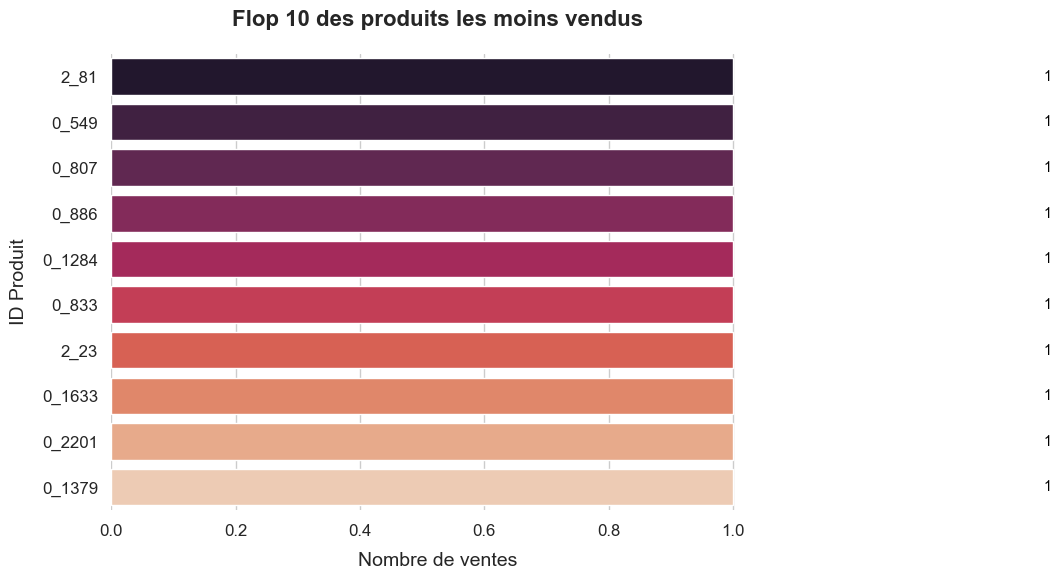

In [181]:
# Configuration du style
plt.figure(figsize=(12, 6))

# Flop 10 des produits les moins vendus
flop_products = df_final['id_prod'].value_counts().tail(10)

# Création du graphique en barres horizontales
sns.barplot(
    x=flop_products.values,
    y=flop_products.index,
    palette="rocket"
)

# Personnalisation du graphique
plt.title('Flop 10 des produits les moins vendus', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Nombre de ventes', fontsize=14, labelpad=10)
plt.ylabel('ID Produit', fontsize=14, labelpad=10)

# Ajouter des valeurs sur les barres
for i, v in enumerate(flop_products.values):
    plt.text(v + 0.5, i, f"{v:,}".replace(",", " "), color='black', ha='left', va='center', fontsize=10)

# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2733225248.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


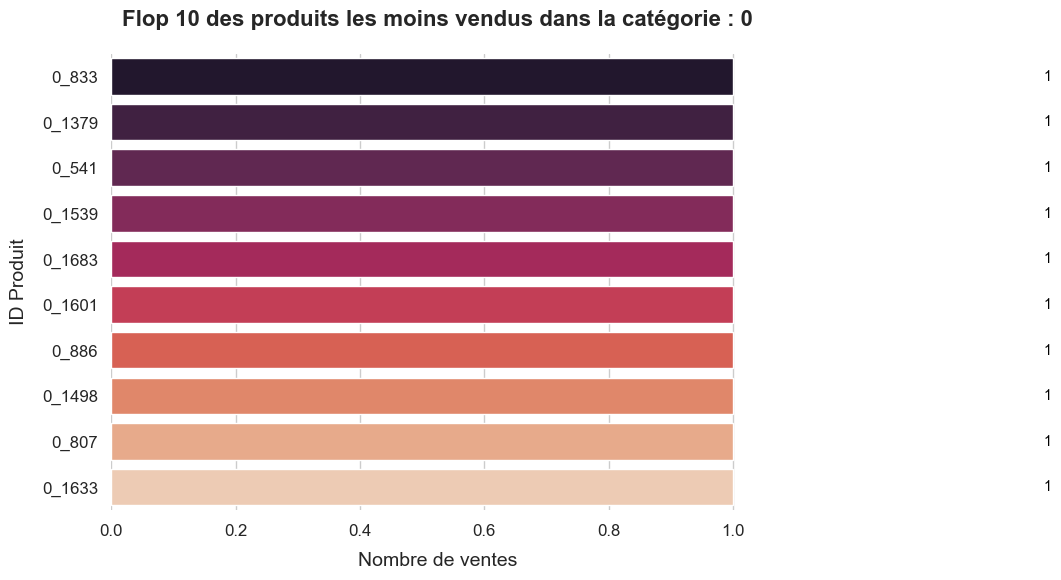

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2733225248.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


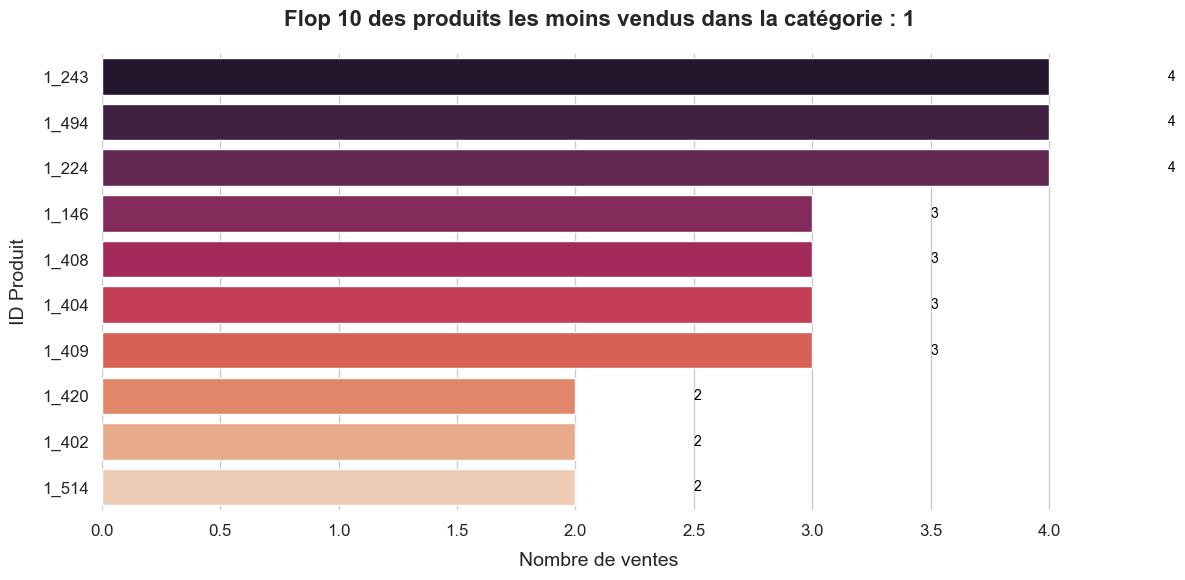

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2733225248.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


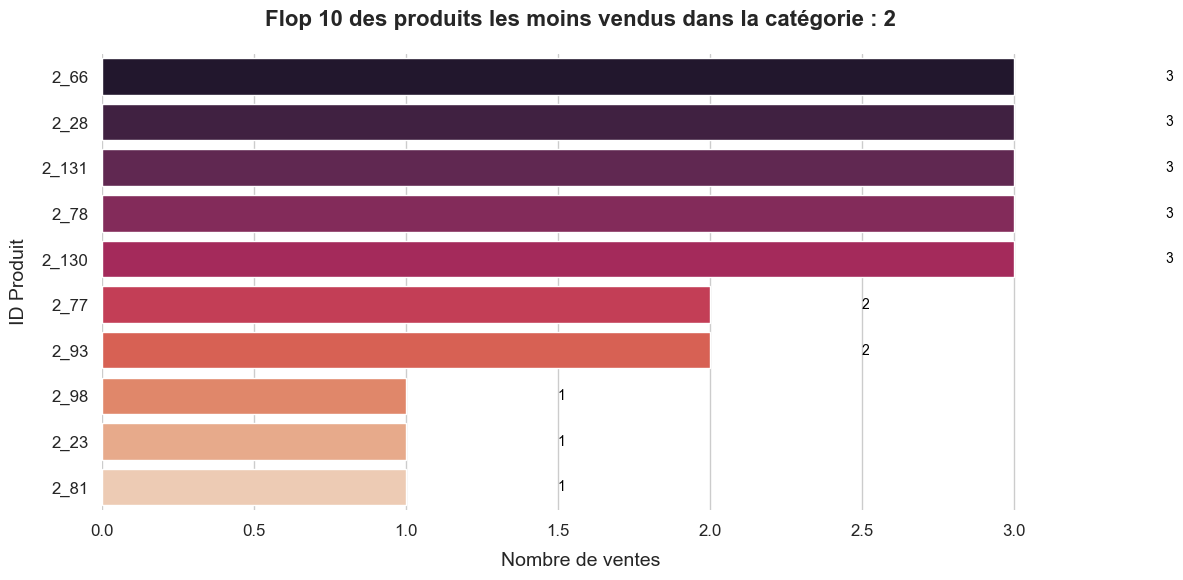

In [221]:
def plot_flop_products_by_category(category):
    # Filtrer les données pour la catégorie spécifiée
    category_data = df_final[df_final['categ'] == category]

    # Calculer le flop 10 des produits les moins vendus dans cette catégorie
    flop_products = category_data['id_prod'].value_counts().tail(10)

    # Configuration du style
    plt.figure(figsize=(12, 6))

    # Création du graphique en barres horizontales
    sns.barplot(
        x=flop_products.values,
        y=flop_products.index.astype(str),  # Convertir en chaîne pour éviter les erreurs
        palette="rocket"  # Palette adaptée pour les "flops"
    )

    # Personnalisation du graphique
    plt.title(f'Flop 10 des produits les moins vendus dans la catégorie : {category}', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Nombre de ventes', fontsize=14, labelpad=10)
    plt.ylabel('ID Produit', fontsize=14, labelpad=10)

    # Ajouter des valeurs sur les barres
    for i, v in enumerate(flop_products.values):
        plt.text(v + 0.5, i, f"{v:,}".replace(",", " "), color='black', ha='left', va='center', fontsize=10)

    # Ajouter une bordure et un style moderne
    sns.despine(left=True, bottom=True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Afficher le graphique
    plt.tight_layout()
    plt.show()
    
    # Générer les graphiques pour les 3 catégories les plus vendues
for category in top_categories:
    plot_flop_products_by_category(category)



In [182]:
# Liste des produits vendus
sold_products = df_final['id_prod'].unique()

# Liste de tous les produits disponibles (exemple : extrait de df_products)
all_products = df_products['id_prod'].unique()

# Produits non vendus (présents dans df_products mais pas dans df_final)
unsold_products = set(all_products) - set(sold_products)

# Nombre de produits non vendus
number_of_unsold_products = len(unsold_products)

print(f"Nombre de produits non vendus : {number_of_unsold_products}")
print(f"Produits non vendus : {unsold_products}")

Nombre de produits non vendus : 21
Produits non vendus : {'0_322', '0_1025', '0_1624', '1_0', '2_86', '0_1062', '1_394', '0_1119', '0_1645', '0_1318', '0_2308', '0_1620', '0_510', '2_87', '0_1800', '0_1016', '2_72', '0_310', '0_299', '0_1014', '0_1780'}


In [183]:
# Compter le nombre de ventes par produit
product_sales = df_final['id_prod'].value_counts()

# Filtrer les produits vendus une seule fois
products_sold_once = product_sales[product_sales == 1]

# Nombre de produits vendus une seule fois
number_of_products_sold_once = len(products_sold_once)

# Afficher le résultat
print(f"Nombre de produits vendus une seule fois : {number_of_products_sold_once}")
print(f"Liste des produits vendus une seule fois : {products_sold_once.index.tolist()}")

Nombre de produits vendus une seule fois : 18
Liste des produits vendus une seule fois : ['0_1498', '0_1151', '0_1601', '0_541', '2_98', '0_1728', '0_1539', '0_1683', '2_81', '0_549', '0_807', '0_886', '0_1284', '0_833', '2_23', '0_1633', '0_2201', '0_1379']


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.8 - Répartition des ventes par catégories</h3>
</div>

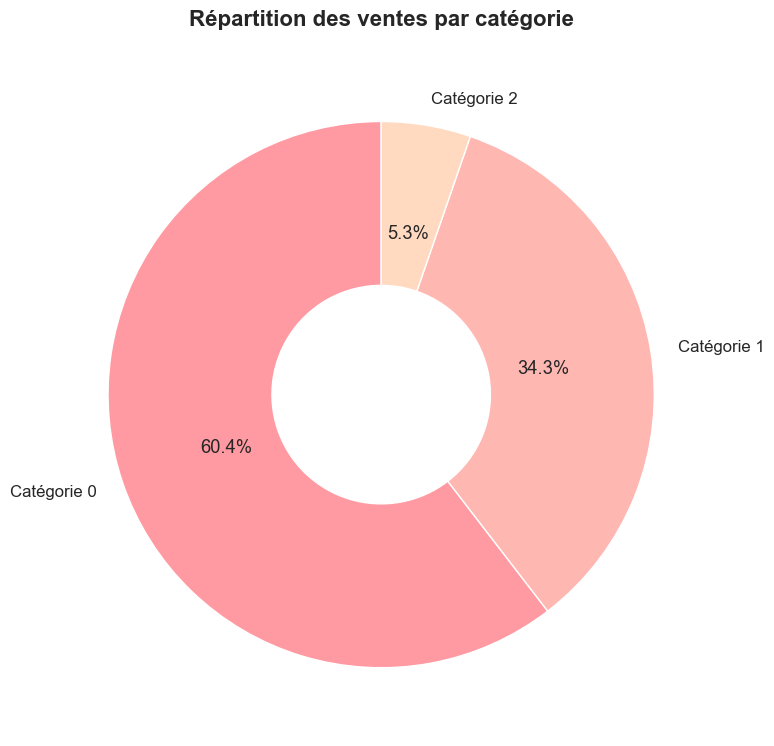

In [184]:
# Configuration du style
plt.figure(figsize=(8, 8))

# Répartition des ventes par catégorie
categ_distribution = df_final['categ'].value_counts(normalize=True) * 100

# Création du graphique en camembert
plt.pie(categ_distribution, labels=[f'Catégorie {c}' for c in categ_distribution.index], autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.6, edgecolor='w'))

# Personnalisation du graphique
plt.title('Répartition des ventes par catégorie', fontsize=16, pad=20, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.9 - Analyses de genres</h3>
</div>

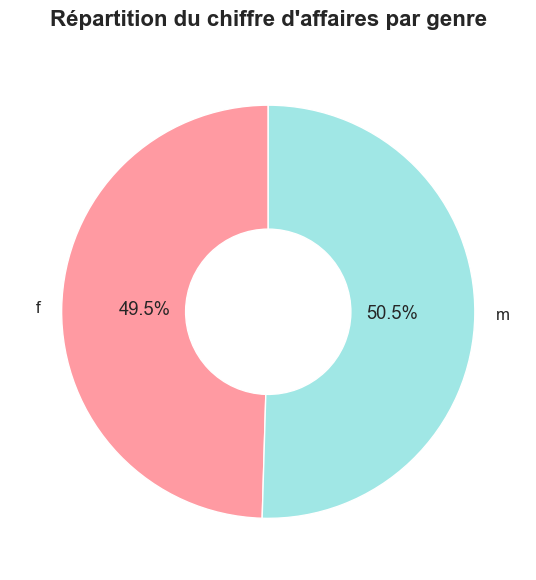

In [222]:
# Calcul du chiffre d'affaires par sexe
revenue_by_sex = df_final.groupby('sex')['revenue'].sum().reset_index()

# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(8, 6))

# Création du graphique en camembert
plt.pie(revenue_by_sex['revenue'], labels=revenue_by_sex['sex'], autopct='%1.1f%%', colors=["#FF9AA2", "#A0E7E5"], startangle=90, wedgeprops=dict(width=0.6, edgecolor='w'))

# Personnalisation du graphique
plt.title('Répartition du chiffre d\'affaires par genre', fontsize=16, pad=20, fontweight='bold')

# Afficher le graphique
plt.tight_layout()
plt.show()

Nombre de clients femmes : 4479
Nombre de clients hommes : 4121


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\216335281.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=client_counts_df, x='sex', y='number_of_clients', palette={"f": "#FF9AA2", "m": "#A0E7E5"})


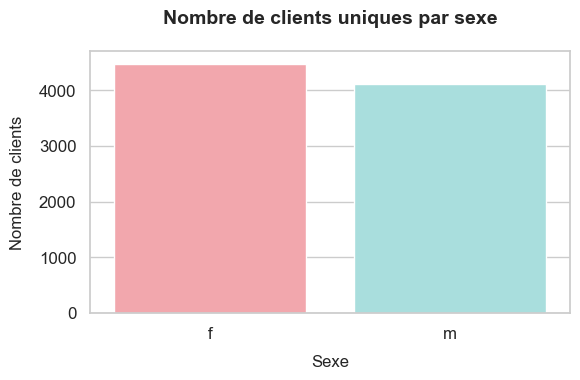

In [186]:
# Compter le nombre de clients uniques par sexe
client_counts = df_final.groupby('sex')['client_id'].nunique()

# Afficher les résultats
print(f"Nombre de clients femmes : {client_counts.get('f', 0)}")
print(f"Nombre de clients hommes : {client_counts.get('m', 0)}")

# Optionnel : Afficher un graphique en barres
import seaborn as sns
import matplotlib.pyplot as plt

# Préparer les données pour le graphique
client_counts_df = client_counts.reset_index()
client_counts_df.columns = ['sex', 'number_of_clients']

# Créer le graphique en barres
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(6, 4))
sns.barplot(data=client_counts_df, x='sex', y='number_of_clients', palette={"f": "#FF9AA2", "m": "#A0E7E5"})

# Personnalisation du graphique
plt.title('Nombre de clients uniques par sexe', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Sexe', fontsize=12, labelpad=10)
plt.ylabel('Nombre de clients', fontsize=12, labelpad=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

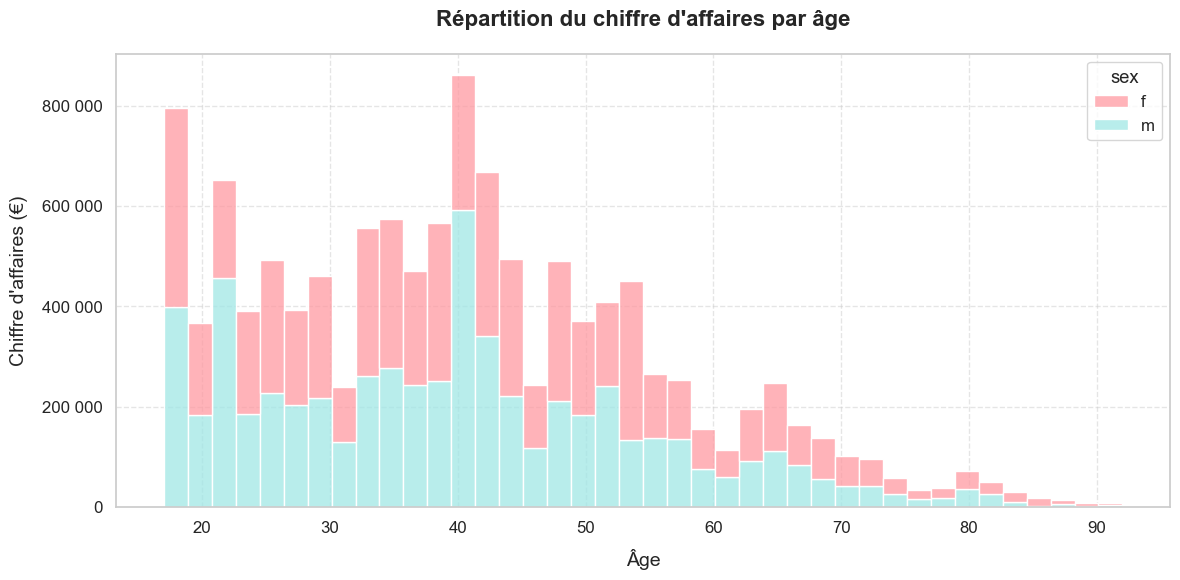

In [187]:
# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Création d'un histogramme empilé du chiffre d'affaires par âge et sexe
sns.histplot(
    data=df_final,
    x='age',
    weights='revenue',
    hue='sex',
    bins=40,
    multiple='stack',
    palette={"f": "#FF9AA2", "m": "#A0E7E5"}
)

# Personnalisation du graphique
plt.title('Répartition du chiffre d\'affaires par âge', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Âge', fontsize=14, labelpad=10)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)

# Formater l'axe Y avec des espaces comme séparateurs de milliers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

# Ajouter une grille légère
plt.grid(linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.10 - Analyses sur les tranches d'âges</h3>
</div>

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2680848779.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df_final.groupby('age_group')['revenue'].sum().reset_index()
C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\2680848779.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_age_group, x='age_group', y='revenue', palette="viridis")


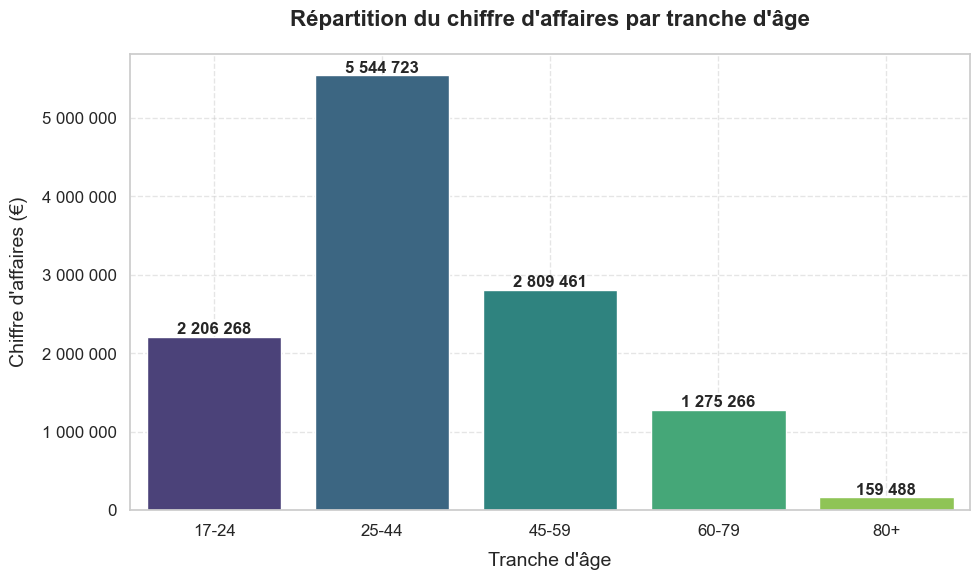

In [188]:
# Définir les catégories d'âge
bins = [17, 25, 45, 60, 80, float('inf')]
labels = ['17-24', '25-44', '45-59', '60-79', '80+']

# Ajouter une colonne 'age_group' au DataFrame
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# Calculer le chiffre d'affaires total par tranche d'âge
revenue_by_age_group = df_final.groupby('age_group')['revenue'].sum().reset_index()

# Configuration du style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(10, 6))

# Création du graphique en barres
sns.barplot(data=revenue_by_age_group, x='age_group', y='revenue', palette="viridis")

# Personnalisation du graphique
plt.title('Répartition du chiffre d\'affaires par tranche d\'âge', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=10)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)

# Formater l'axe Y avec des espaces comme séparateurs de milliers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

# Ajouter des annotations sur les barres
for index, row in revenue_by_age_group.iterrows():
    plt.text(index, row['revenue'], f"{row['revenue']:,.0f}".replace(",", " "),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ajouter une grille légère
plt.grid(linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\3447166720.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_and_category = df_final.groupby(['age_group', 'categ'])['revenue'].sum().reset_index()


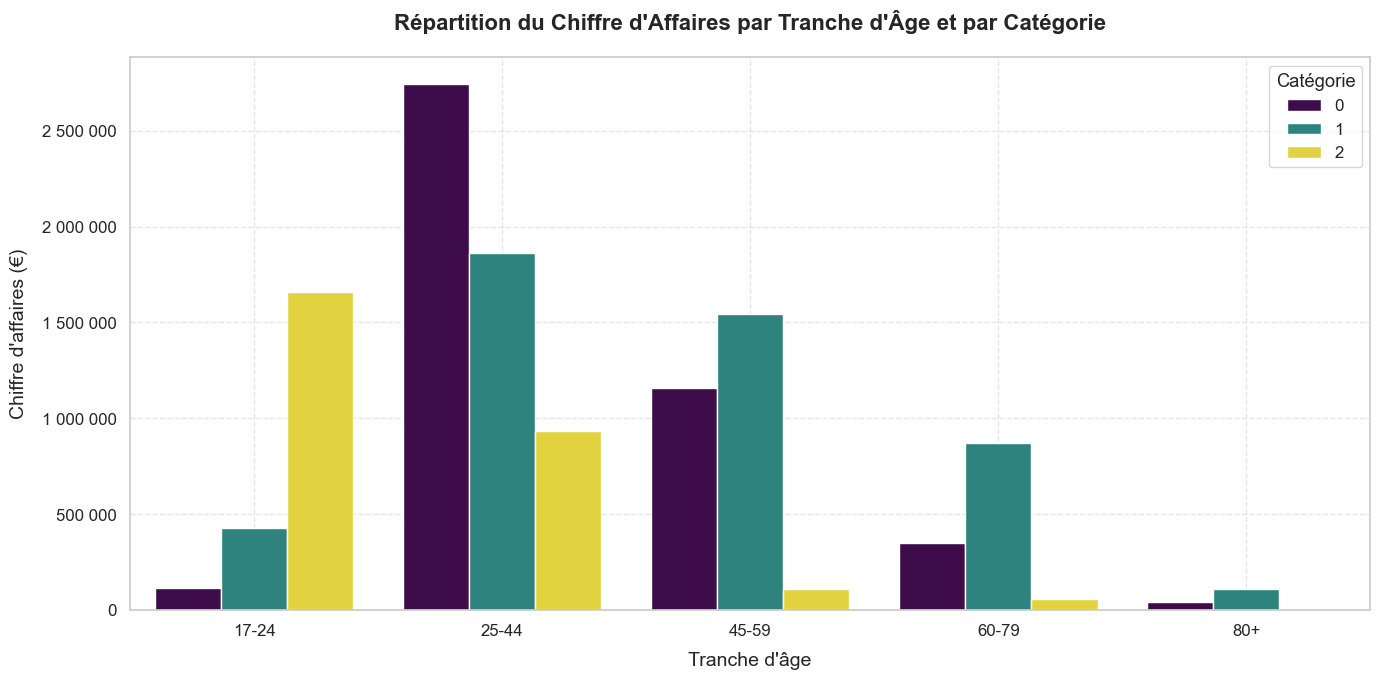

In [189]:
# Supposons que df_final est déjà chargé et contient les colonnes 'age', 'revenue', et 'category'
# (Remplacez 'category' par le nom réel de votre colonne de catégorie si nécessaire)

# 1. Définir les catégories d'âge
bins = [17, 25, 45, 60, 80, float('inf')]
labels = ['17-24', '25-44', '45-59', '60-79', '80+']

# Ajouter une colonne 'age_group' au DataFrame
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# 2. Calculer le chiffre d'affaires total par TRANCHE D'ÂGE ET par CATÉGORIE
revenue_by_age_and_category = df_final.groupby(['age_group', 'categ'])['revenue'].sum().reset_index()
# Si vous utilisez les catégories 0, 1, 2 des graphiques précédents, le nom de la colonne pourrait être 'categorie_id' ou similaire.

# 3. Configuration et Création du graphique en barres GROUPÉES
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
plt.figure(figsize=(14, 7))

# Utiliser 'hue' pour différencier les catégories (barres groupées)
sns.barplot(
    data=revenue_by_age_and_category,
    x='age_group',
    y='revenue',
    hue='categ',  # <--- CLÉ DE LA RÉPARTITION PAR CATÉGORIE
    palette="viridis"
)

# 4. Personnalisation du graphique
plt.title('Répartition du Chiffre d\'Affaires par Tranche d\'Âge et par Catégorie', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tranche d\'âge', fontsize=14, labelpad=10)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=14, labelpad=10)

# Formater l'axe Y avec des espaces comme séparateurs de milliers
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", " ")))

# Ajouter une légende
plt.legend(title='Catégorie', loc='upper right')

# Ajouter une grille légère
plt.grid(linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.11 - Analyses complémentaires</h3>
</div>

+ Courbe de Lorentz

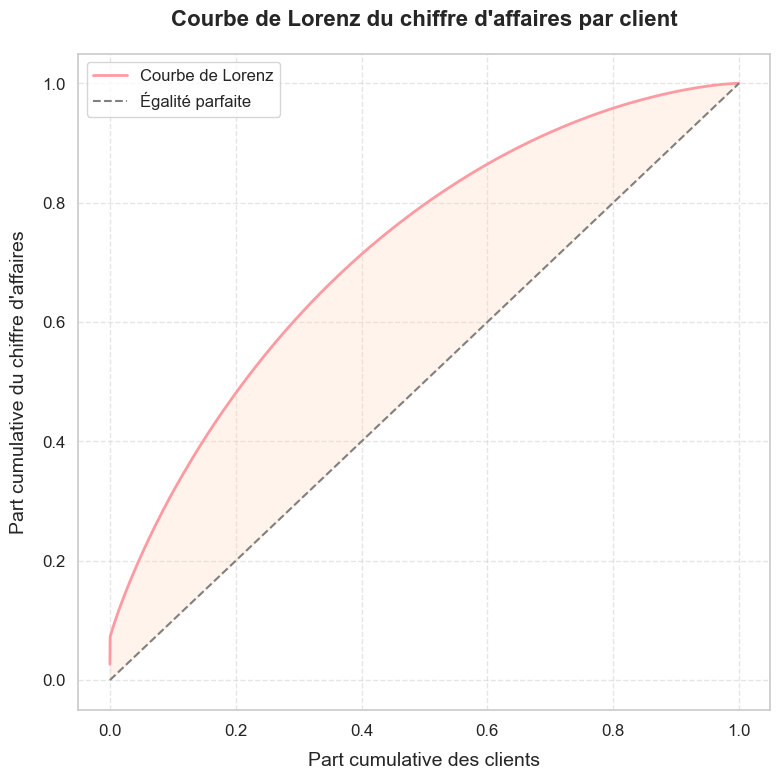

Coefficient de Gini : -0.44


In [274]:
# Calcul du chiffre d'affaires par client
client_revenue = df_final.groupby('client_id')['revenue'].sum().sort_values(ascending=False)

# Calcul des parts cumulées
cumulative_revenue = client_revenue.cumsum()
total_revenue = client_revenue.sum()
lorenz_curve = cumulative_revenue / total_revenue

# Normalisation de l'axe des x (part cumulative des clients)
num_clients = len(client_revenue)
lorenz_curve = lorenz_curve.reset_index(drop=True)
lorenz_curve.index = lorenz_curve.index / num_clients

# Configuration du style
plt.figure(figsize=(8, 8))

# Création de la courbe de Lorenz
plt.plot(lorenz_curve.index, lorenz_curve, label='Courbe de Lorenz', color='#FF9AA2', linewidth=2)

# Ligne d'égalité parfaite
plt.plot([0, 1], [0, 1], label='Égalité parfaite', linestyle='--', color='gray')

# Remplir la zone entre la courbe de Lorenz et la ligne d'égalité
plt.fill_between(lorenz_curve.index, lorenz_curve, [i/num_clients for i in range(num_clients)], color='#FFDAC1', alpha=0.3)

# Personnalisation du graphique
plt.title('Courbe de Lorenz du chiffre d\'affaires par client', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Part cumulative des clients', fontsize=14, labelpad=10)
plt.ylabel('Part cumulative du chiffre d\'affaires', fontsize=14, labelpad=10)
plt.legend(fontsize=12)

# Ajouter une grille légère
plt.grid(linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Calcul du coefficient de Gini (optionnel)
area_under_lorenz = lorenz_curve.sum() / num_clients
area_under_equality = 0.5
gini_coefficient = (area_under_equality - area_under_lorenz) / area_under_equality

print(f"Coefficient de Gini : {gini_coefficient:.2f}")

Top 10 des clients les plus rentables avec leur tranche d'âge :
     client_id age_group    revenue
8599    c_1609     25-44  319571.87
8598    c_4958     17-24  283918.32
8597    c_6714     45-59  152262.04
8596    c_3454     45-59  113130.87
8595    c_1570     25-44    5285.82
8594    c_3263     25-44    5276.87
8593    c_2140     25-44    5260.18
8592    c_2899     25-44    5214.05
8591    c_7319     45-59    5155.77
8590    c_7959     45-59    5135.75


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_3484\163400763.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


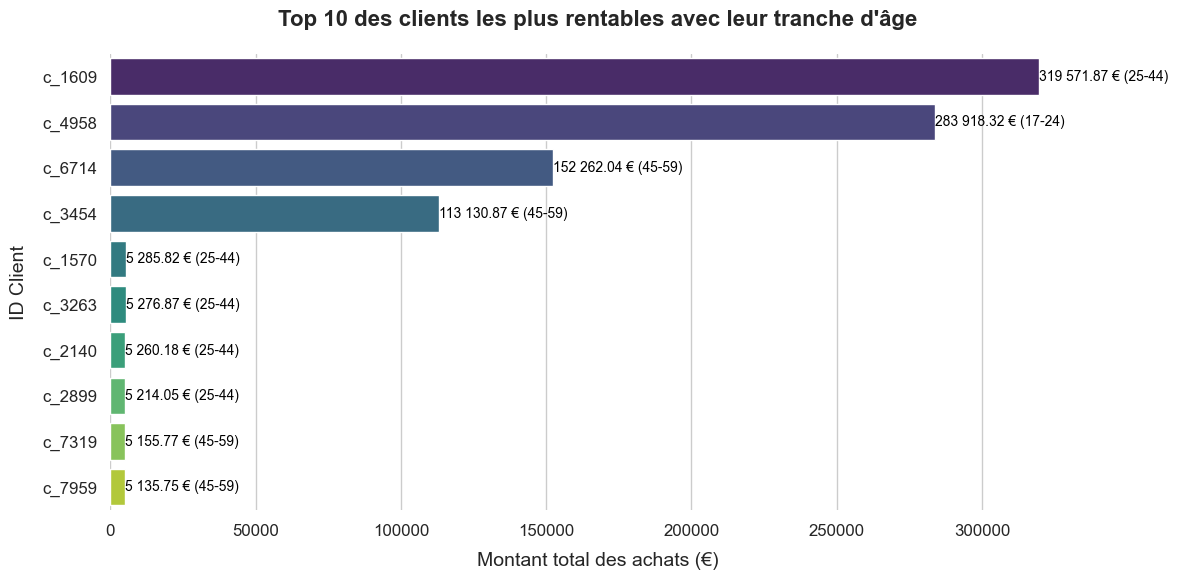

In [272]:


# Fusionner avec les informations d'âge
client_revenue_with_age = pd.merge(
    client_revenue,
    df_final[['client_id', 'age_group']].drop_duplicates(),  # Conserver une seule occurrence par client
    on='client_id'
)

# Trier par montant total décroissant et sélectionner le top 10
top_clients_with_age = client_revenue_with_age.sort_values(by='revenue', ascending=False).head(10)

# Afficher le top 10 des clients les plus rentables avec leur tranche d'âge
print("Top 10 des clients les plus rentables avec leur tranche d'âge :")
print(top_clients_with_age[['client_id', 'age_group', 'revenue']])

# Configuration du style
plt.figure(figsize=(12, 6))

# Création du graphique en barres horizontales
sns.barplot(
    x=top_clients_with_age['revenue'],
    y=top_clients_with_age['client_id'].astype(str),  # Convertir les IDs en chaînes
    palette="viridis"
)

# Ajouter des annotations pour les tranches d'âge
for i, (client_id, age_group, revenue) in enumerate(zip(top_clients_with_age['client_id'], top_clients_with_age['age_group'], top_clients_with_age['revenue'])):
    plt.text(revenue + 0.5, i, f"{revenue:,.2f} € ({age_group})".replace(",", " "), color='black', ha='left', va='center', fontsize=10)

# Personnalisation du graphique
plt.title('Top 10 des clients les plus rentables avec leur tranche d\'âge', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Montant total des achats (€)', fontsize=14, labelpad=10)
plt.ylabel('ID Client', fontsize=14, labelpad=10)

# Ajouter une bordure et un style moderne
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Afficher le graphique
plt.tight_layout()
plt.show()

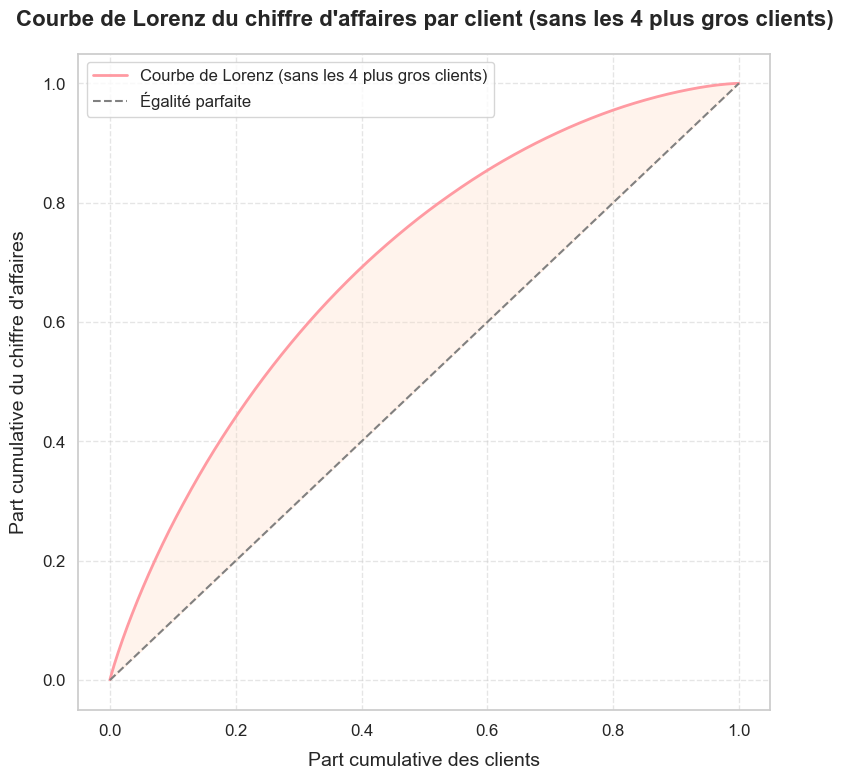

In [275]:
# Identifier les 4 plus gros clients
top_4_clients = client_revenue.head(4)

# Exclure les 4 plus gros clients
filtered_client_revenue = client_revenue.drop(top_4_clients.index)

# Calcul des parts cumulées sans les 4 plus gros clients
cumulative_revenue = filtered_client_revenue.cumsum()
total_revenue = filtered_client_revenue.sum()
lorenz_curve = cumulative_revenue / total_revenue

# Normalisation de l'axe des X (part cumulative des clients restants)
num_clients = len(filtered_client_revenue)
x_values = np.linspace(0, 1, num_clients)
lorenz_curve = lorenz_curve.reset_index(drop=True)
lorenz_curve.index = lorenz_curve.index / num_clients

# Configuration du style
plt.figure(figsize=(8, 8))

# Création de la courbe de Lorenz
plt.plot(lorenz_curve.index, lorenz_curve, label='Courbe de Lorenz (sans les 4 plus gros clients)', color='#FF9AA2', linewidth=2)

# Ligne d'égalité parfaite
plt.plot([0, 1], [0, 1], label='Égalité parfaite', linestyle='--', color='gray')

# Remplir la zone entre la courbe de Lorenz et la ligne d'égalité
plt.fill_between(lorenz_curve.index, lorenz_curve, x_values, color='#FFDAC1', alpha=0.3)

# Personnalisation du graphique
plt.title('Courbe de Lorenz du chiffre d\'affaires par client (sans les 4 plus gros clients)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Part cumulative des clients', fontsize=14, labelpad=10)
plt.ylabel('Part cumulative du chiffre d\'affaires', fontsize=14, labelpad=10)
plt.legend(fontsize=12)

# Ajouter une grille légère
plt.grid(linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse complémentaire Julie</h2>
</div>

In [25]:
print(df_final)


       id_prod       date client_id  price  categ sex  age
0       0_1259 2021-03-01     c_329  11.99      0   f   54
1       0_1390 2021-03-01     c_664  19.37      0   m   61
2       0_1352 2021-03-01     c_580   4.50      0   m   33
3       0_1458 2021-03-01    c_7912   6.55      0   f   32
4       0_1358 2021-03-01    c_2033  16.49      0   f   65
...        ...        ...       ...    ...    ...  ..  ...
687529   1_508 2023-02-28    c_3573  21.92      1   f   25
687530    2_37 2023-02-28      c_50  48.99      2   f   27
687531   1_695 2023-02-28     c_488  26.99      1   f   36
687532  0_1547 2023-02-28    c_4848   8.99      0   m   68
687533  0_1398 2023-02-28    c_3575   4.52      0   f   40

[685908 rows x 7 columns]


In [26]:
df_final.dtypes

id_prod              object
date         datetime64[ns]
client_id            object
price               float64
categ                 int64
sex                  object
age                   int64
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Lien entre genre des clients et catégories des livres achetés</h3>
</div>

In [31]:
# Créer un tableau croisé dynamique
cross_tab = pd.crosstab(df_final['sex'], df_final['categ'], normalize='index')

# Afficher le tableau
print("Répartition des achats par genre et catégorie (en %) :")
print(cross_tab)


Répartition des achats par genre et catégorie (en %) :
categ         0         1         2
sex                                
f      0.601500  0.348078  0.050422
m      0.607185  0.337418  0.055397


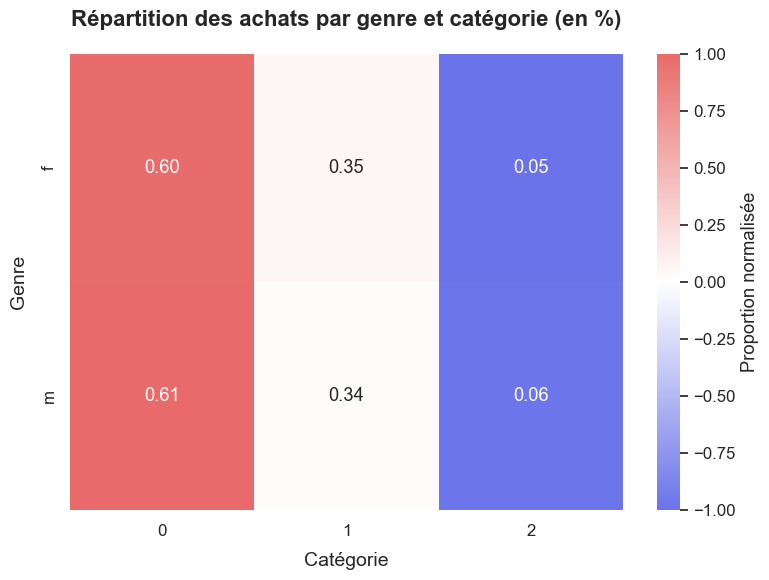

In [174]:
from matplotlib.colors import LinearSegmentedColormap

# Normaliser les données pour la heatmap (entre -1 et 1)
min_val = cross_tab.min().min()
max_val = cross_tab.max().max()
normalized_data = 2 * (cross_tab - min_val) / (max_val - min_val) - 1

# Créer un colormap personnalisé bleu-blanc-rouge
cmap = LinearSegmentedColormap.from_list('blue_white_red', ['#6A73E9', 'white', '#E96A6A'])

# Configuration du style
plt.figure(figsize=(8, 6))

# Création de la heatmap avec le colormap personnalisé
ax = sns.heatmap(
    normalized_data,
    cmap=cmap,
    annot=cross_tab,  # Afficher les valeurs originales dans les cases
    fmt=".2f",
    vmin=-1,  # Valeur minimale de la légende
    vmax=1,   # Valeur maximale de la légende
    cbar_kws={'label': 'Proportion normalisée'}
)

# Personnalisation du graphique
plt.title('Répartition des achats par genre et catégorie (en %)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Catégorie', fontsize=14, labelpad=10)
plt.ylabel('Genre', fontsize=14, labelpad=10)

# Afficher le graphique
plt.tight_layout()
plt.show()

# recherche
+ "sex" est une variable qualitative binaire (f/m),
+ "categ" est une variable qualitative (catégories de livres)
+ Hypothèses :
+ H0: Il n'y a pas de lien entre le genre des clients et les catégories de livres achetés;
+ H1: Les femmes achètent plus de livres de la catégorie 1 que les hommes
+ choix du test Chi-carré

In [132]:
# Construire la table de contingence
contingency_table = pd.crosstab(df_final['sex'], df_final['categ'])

# Calculer les effectifs théoriques et la statistique du chi-carré
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Interpréter les résultats
print(f"Statistique du Chi-carré: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique du Chi-carré: 146.24164613691994
P-value: 1.7540017775036138e-32
Degrés de liberté: 2
Fréquences attendues:
[[206779.91623366 117267.96888941  18105.11487692]
 [207748.08376634 117817.03111059  18189.88512308]]


In [38]:
# Valeurs critiques pour un seuil de 0.05
critical_values = {1: 3.841, 2: 5.991, 3: 7.815, 4: 9.488, 5: 11.070}

# Comparaison
if chi2_stat > critical_values.get(dof, float('inf')):
    print("Il existe une relation statistiquement significative entre le genre et la catégorie des livres achetés.")
else:
    print("Il n'y a pas de relation statistiquement significative entre le genre et la catégorie des livres achetés.")

Il existe une relation statistiquement significative entre le genre et la catégorie des livres achetés.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">le lien entre l'âge des clients et le montant total des achats</h3>
</div>

# recherche
+ H0: Il n'y a pas de lien entre l'âge des clients et le montant total des achats,
+ H1: Il y a un lien entre entre l'âge des clients et le montant total des achats
+ suppression des 4 plus gros clients
+ choix du test Shapiro

In [71]:
# Calculer le montant total des achats par client
client_revenue = df_final.groupby('client_id')['price'].sum().sort_values(ascending=False)

# Identifier les 4 plus gros clients
top_4_clients = client_revenue.head(4)

# Exclure les 4 plus gros clients du DataFrame initial
filtered_df = df_final[~df_final['client_id'].isin(top_4_clients.index)]


In [ ]:
# Calculer le montant total des achats par client restant
total_spent_per_client = filtered_df.groupby('client_id')['price'].sum().reset_index()

# Fusionner avec les tranches d'âge
df_merged = pd.merge(filtered_df[['client_id', 'age_group']].drop_duplicates(), total_spent_per_client, on='client_id')
df_merged = df_merged.dropna(subset=['age_group'])  # Supprimer les clients sans âge défini


In [76]:
from scipy.stats import shapiro
# Test de Shapiro-Wilk pour chaque tranche d'âge
shapiro_results = {}
for group in labels:
    data = df_merged[df_merged['age_group'] == group]['price']
    shapiro_stat, shapiro_p_value = shapiro(data)
    shapiro_results[group] = {'Statistique': shapiro_stat, 'P-value': shapiro_p_value}

# Afficher les résultats
for group, result in shapiro_results.items():
    print(f"Tranche d'âge {group}: Statistique = {result['Statistique']:.4f}, P-value = {result['P-value']:.4f}")

Tranche d'âge 17-24: Statistique = 0.9279, P-value = 0.0000
Tranche d'âge 25-44: Statistique = 0.9182, P-value = 0.0000
Tranche d'âge 45-59: Statistique = 0.8937, P-value = 0.0000
Tranche d'âge 60-79: Statistique = 0.9213, P-value = 0.0000
Tranche d'âge 80+: Statistique = 0.9236, P-value = 0.0000


+ les données ne suivent pas une distribution normale
+ test de kruskal-wallis

In [77]:
from scipy.stats import kruskal

# Effectuer le test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(
    df_merged[df_merged['age_group'] == '17-24']['price'],
    df_merged[df_merged['age_group'] == '25-44']['price'],
    df_merged[df_merged['age_group'] == '45-59']['price'],
    df_merged[df_merged['age_group'] == '60-79']['price'],
    df_merged[df_merged['age_group'] == '80+']['price']
)

print(f"Statistique de Kruskal-Wallis : {kruskal_stat:.4f}, P-value : {kruskal_p_value:.4f}")

Statistique de Kruskal-Wallis : 433.8219, P-value : 0.0000


+ p-value = 0, il existe une différence significative entre au moins deux tranches d'âges
+ test post-hoc de Dunn

In [78]:
import scikit_posthocs as sp

# Test post-hoc de Dunn
dunn_results = sp.posthoc_dunn(df_merged, val_col='price', group_col='age_group', p_adjust='bonferroni')
print(dunn_results)


              17-24         25-44         45-59         60-79           80+
17-24  1.000000e+00  1.801569e-04  7.143702e-10  2.149903e-27  8.624187e-08
25-44  1.801569e-04  1.000000e+00  4.192732e-42  4.614840e-73  1.531952e-13
45-59  7.143702e-10  4.192732e-42  1.000000e+00  5.938467e-08  1.743091e-02
60-79  2.149903e-27  4.614840e-73  5.938467e-08  1.000000e+00  1.000000e+00
80+    8.624187e-08  1.531952e-13  1.743091e-02  1.000000e+00  1.000000e+00


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\2615286370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='price', data=df_merged, order=labels, palette='viridis')


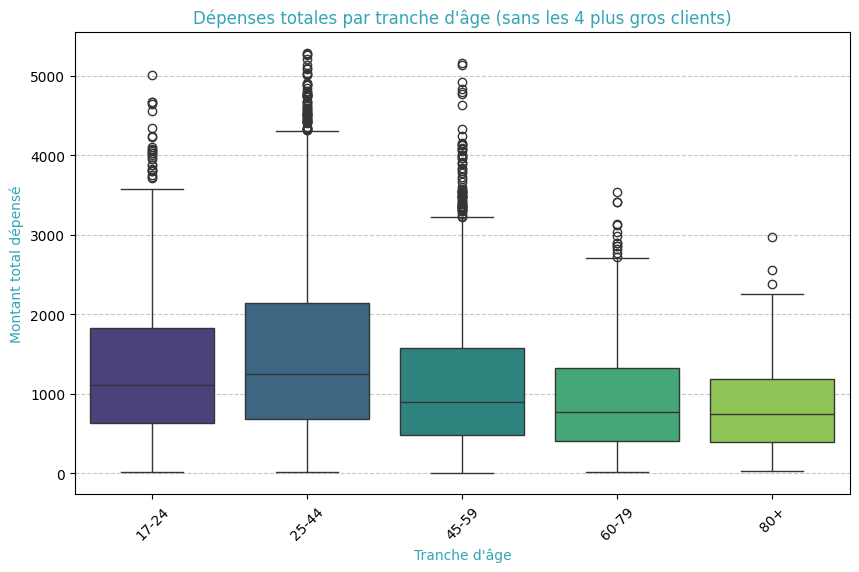

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='price', data=df_merged, order=labels, palette='viridis')
plt.title('Dépenses totales par tranche d\'âge (sans les 4 plus gros clients)', color=(51/255, 165/255, 182/255))
plt.xlabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Montant total dépensé', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



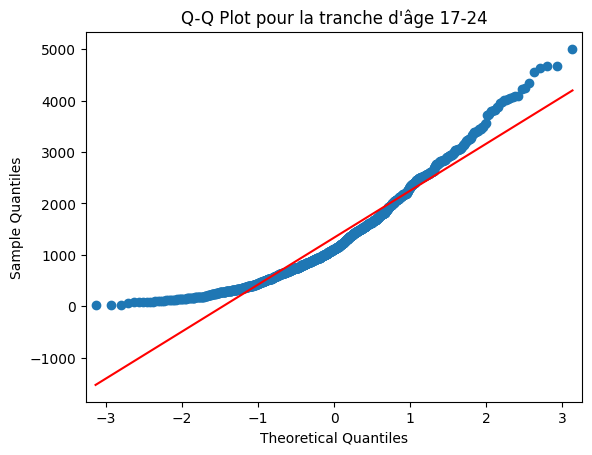

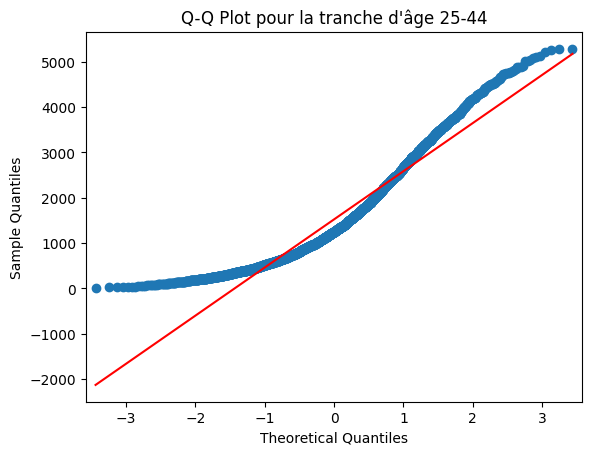

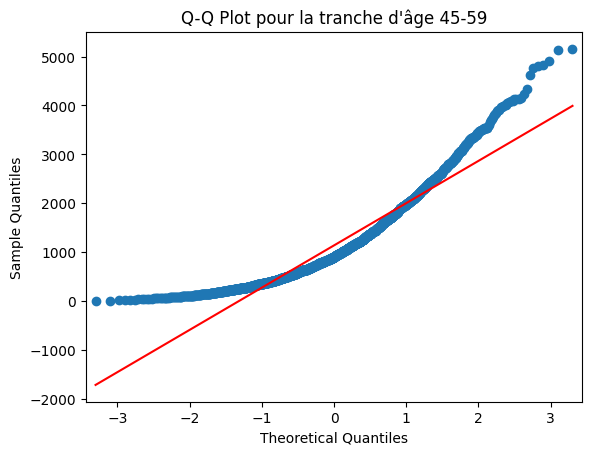

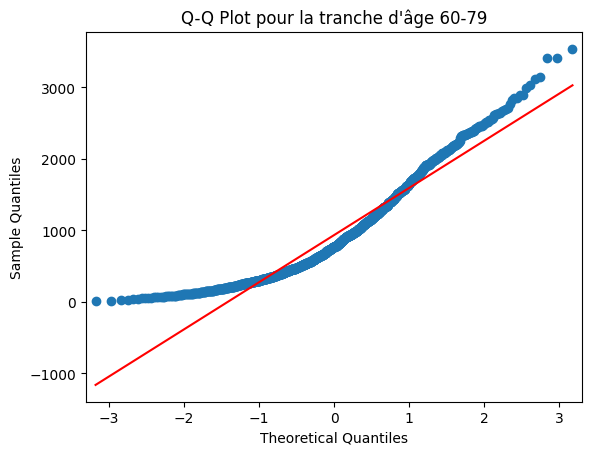

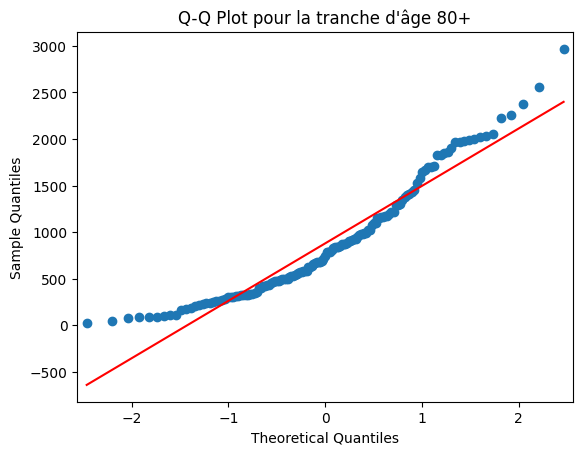

In [82]:
import statsmodels.api as sm

for group in labels:
    data = df_merged[df_merged['age_group'] == group]['price']
    sm.qqplot(data, line='s')
    plt.title(f"Q-Q Plot pour la tranche d'âge {group}")
    plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">le lien entre l'âge des clients et la fréquence d’achat</h3>
</div>

# recherche
+ H0: Il n'y a pas de lien entre l'âge des clients et la fréquence d'achat,
+ H1: il existe un lien entre l'âge des clients et la fréquence d'achat
+ suppression des 4 plus gros clients
+ choix du test Shapiro

In [101]:
# Calculer la fréquence d'achat par client (nombre d'achats)
purchase_frequency = df_final.groupby(['client_id', 'age_group']).size().reset_index(name='purchase_count')

# Exclure les 4 plus gros clients (si nécessaire)
top_4_clients = df_final.groupby('client_id').size().sort_values(ascending=False).head(4).index
filtered_purchase_frequency = purchase_frequency[~purchase_frequency['client_id'].isin(top_4_clients)]

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\3040852773.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency = df_final.groupby(['client_id', 'age_group']).size().reset_index(name='purchase_count')


In [138]:
# Calculer la fréquence moyenne d'achat par tranche d'âge
avg_purchase_frequency = filtered_purchase_frequency.groupby('age_group')['purchase_count'].mean().reset_index()


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\2786823628.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_frequency = filtered_purchase_frequency.groupby('age_group')['purchase_count'].mean().reset_index()


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\3711352778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age_group', y='purchase_count', data=filtered_purchase_frequency, palette='viridis', inner='box')


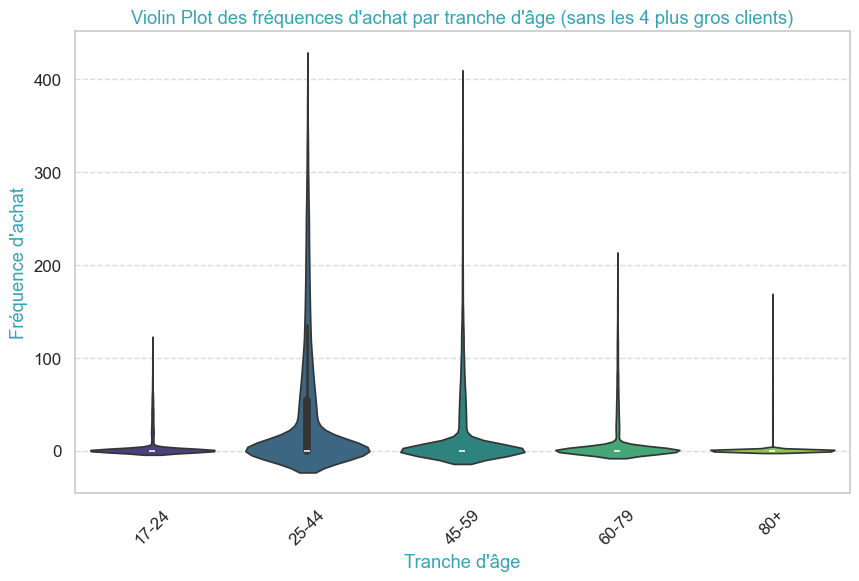

In [141]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='purchase_count', data=filtered_purchase_frequency, palette='viridis', inner='box')

plt.title('Violin Plot des fréquences d\'achat par tranche d\'âge (sans les 4 plus gros clients)', color=(51/255, 165/255, 182/255))
plt.xlabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Fréquence d\'achat', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [102]:
# Test de Shapiro-Wilk pour chaque tranche d'âge
shapiro_results = {}
for group in labels:
    data = filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == group]['purchase_count']
    shapiro_stat, shapiro_p_value = shapiro(data)
    shapiro_results[group] = {'Statistique': shapiro_stat, 'P-value': shapiro_p_value}

# Afficher les résultats
for group, result in shapiro_results.items():
    print(f"Tranche d'âge {group}: Statistique = {result['Statistique']:.4f}, P-value = {result['P-value']:.4f}")

Tranche d'âge 17-24: Statistique = 0.3823, P-value = 0.0000
Tranche d'âge 25-44: Statistique = 0.6358, P-value = 0.0000
Tranche d'âge 45-59: Statistique = 0.4807, P-value = 0.0000
Tranche d'âge 60-79: Statistique = 0.4001, P-value = 0.0000
Tranche d'âge 80+: Statistique = 0.0854, P-value = 0.0000


c:\Users\1340MAD\OneDrive - Office des Postes et des Télécommunications (1)\Bureau\PROJET 9\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


+  les données de fréquence d'achat ne suivent pas une distribution normale pour aucune des tranches d'âge

In [103]:
# Effectuer le test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(
    filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == '17-24']['purchase_count'],
    filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == '25-44']['purchase_count'],
    filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == '45-59']['purchase_count'],
    filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == '60-79']['purchase_count'],
    filtered_purchase_frequency[filtered_purchase_frequency['age_group'] == '80+']['purchase_count']
)

print(f"Statistique de Kruskal-Wallis : {kruskal_stat:.4f}, P-value : {kruskal_p_value:.4f}")

Statistique de Kruskal-Wallis : 4817.0861, P-value : 0.0000


+ La valeur 4817.0861 est extrêmement élevée, ce qui indique une différence très marquée entre les rangs moyens des fréquences d'achat dans les différentes tranches d'âge.
+ p-value = 0, il existe une différence significative entre au moins deux tranches d'âges en terme de fréquences

In [134]:
# Test post-hoc de Dunn
dunn_results = sp.posthoc_dunn(filtered_purchase_frequency, val_col='purchase_count', group_col='age_group', p_adjust='bonferroni')
print(dunn_results)

              17-24          25-44          45-59          60-79  \
17-24  1.000000e+00   0.000000e+00   6.938996e-84   7.654710e-05   
25-44  0.000000e+00   1.000000e+00  8.515924e-170   0.000000e+00   
45-59  6.938996e-84  8.515924e-170   1.000000e+00   3.513943e-50   
60-79  7.654710e-05   0.000000e+00   3.513943e-50   1.000000e+00   
80+    1.467888e-72   0.000000e+00  1.783682e-309  2.930795e-112   

                 80+  
17-24   1.467888e-72  
25-44   0.000000e+00  
45-59  1.783682e-309  
60-79  2.930795e-112  
80+     1.000000e+00  


In [170]:
# Fusionner avec l'âge moyen des clients dans chaque tranche d'âge
filtered_purchase_frequency = filtered_purchase_frequency.merge(
    df_final.groupby('client_id')['age'].mean().reset_index(),
    on='client_id',
    how='left'
)

In [171]:
from scipy.stats import shapiro, kruskal, spearmanr, pearsonr
corr_spearman, p_value_spearman = spearmanr(filtered_purchase_frequency['age'], filtered_purchase_frequency['purchase_count'])
print(f"Corrélation de Spearman: rho = {corr_spearman:.4f}, P-value = {p_value_spearman:.4f}")


Corrélation de Spearman: rho = 0.0462, P-value = 0.0000


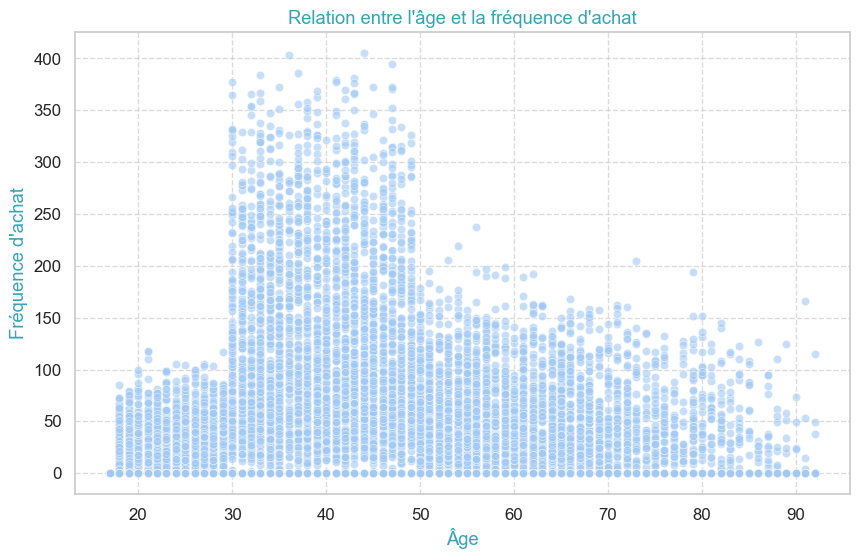

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='purchase_count', data=filtered_purchase_frequency, alpha=0.6)
plt.title('Relation entre l\'âge et la fréquence d\'achat', color=(51/255, 165/255, 182/255))
plt.xlabel('Âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Fréquence d\'achat', color=(51/255, 165/255, 182/255))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">le lien entre l'âge des clients et la taille du panier moyen</h3>
</div>

 # Visualisation

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\1391471972.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_basket_size_by_age = basket_size_by_age.groupby('age_group')['basket_size'].mean().reset_index()


Taille moyenne du panier par tranche d'âge :
  age_group  basket_size
0     17-24    41.684796
1     25-44    18.706452
2     45-59    15.780908
3     60-79    16.851433
4       80+    16.795403


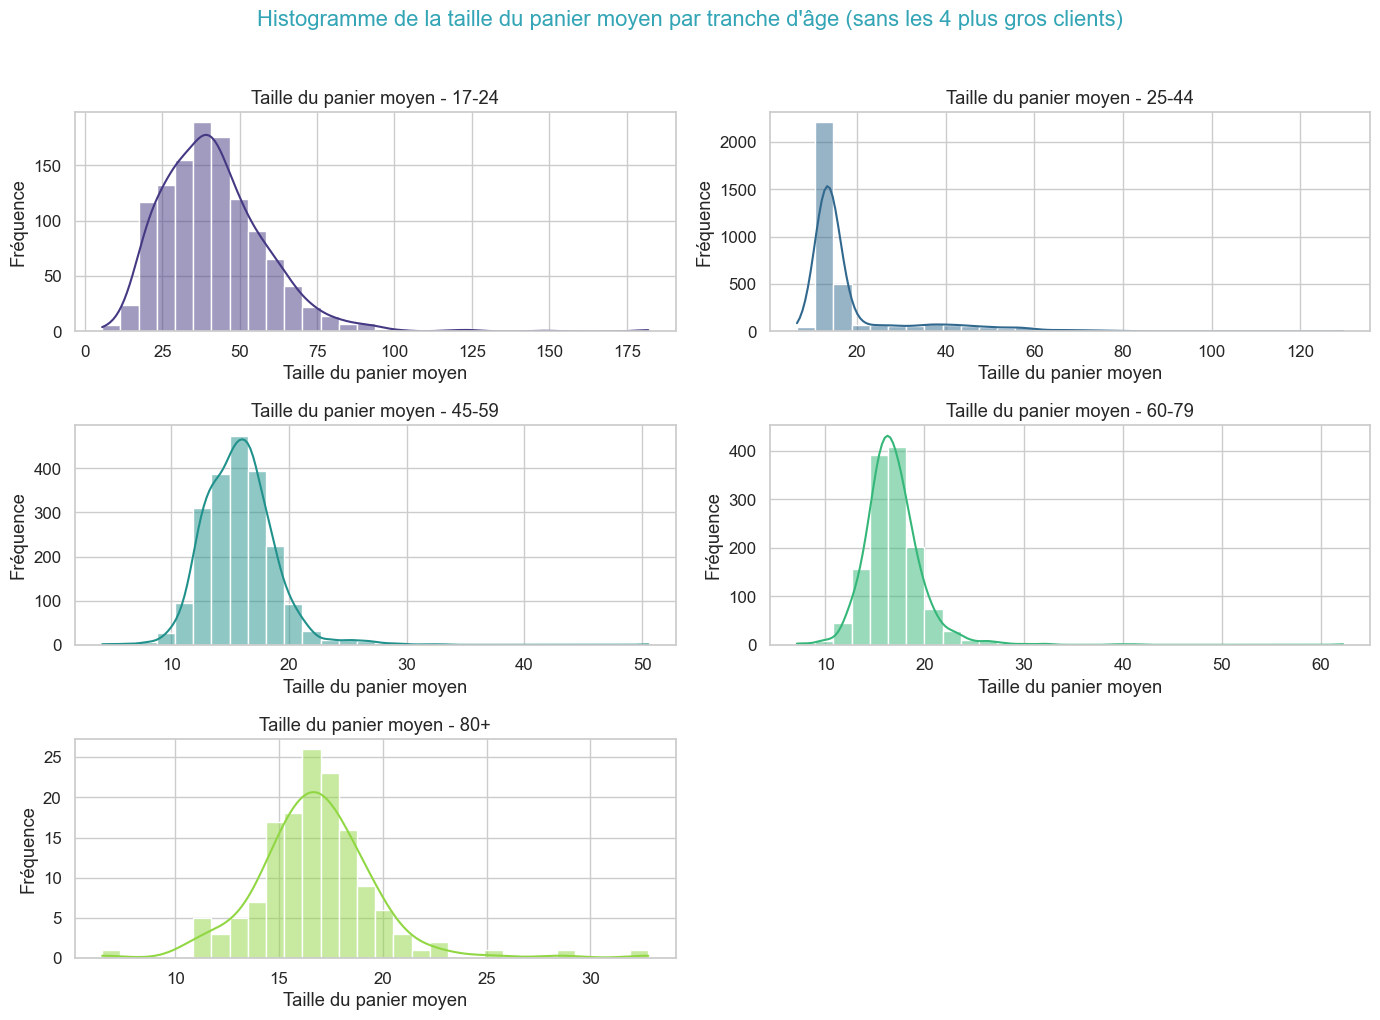

In [110]:
# Calculer le montant total des achats et le nombre de commandes par client
client_stats = df_final.groupby('client_id').agg(
    total_spent=('price', 'sum'),
    order_count=('price', 'count')
)

# Calculer la taille du panier moyen par client
client_stats['basket_size'] = client_stats['total_spent'] / client_stats['order_count']

# Identifier les 4 plus gros clients en termes de montant total dépensé
top_4_clients = client_stats.nlargest(4, 'total_spent').index

# Filtrer les données pour exclure les 4 plus gros clients
filtered_client_stats = client_stats.drop(top_4_clients)

# Fusionner avec les tranches d'âge
bins = [17, 25, 45, 60, 80, float('inf')]
labels = ['17-24', '25-44', '45-59', '60-79', '80+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels)
filtered_df = df_final[~df_final['client_id'].isin(top_4_clients)]

# Fusionner les données pour obtenir la taille du panier moyen par tranche d'âge
basket_size_by_age = pd.merge(filtered_client_stats[['basket_size']], filtered_df[['client_id', 'age_group']].drop_duplicates(), on='client_id', how='left')
basket_size_by_age = basket_size_by_age.dropna(subset=['age_group'])

# Calculer la taille moyenne du panier par tranche d'âge
avg_basket_size_by_age = basket_size_by_age.groupby('age_group')['basket_size'].mean().reset_index()
print("Taille moyenne du panier par tranche d'âge :")
print(avg_basket_size_by_age)

# Créer un histogramme pour chaque tranche d'âge
plt.figure(figsize=(14, 10))

for i, age_group in enumerate(labels, 1):
    plt.subplot(3, 2, i)
    subset = basket_size_by_age[basket_size_by_age['age_group'] == age_group]
    sns.histplot(subset['basket_size'], bins=30, kde=True, color=sns.color_palette('viridis', n_colors=len(labels))[i-1])
    plt.title(f'Taille du panier moyen - {age_group}')
    plt.xlabel('Taille du panier moyen')
    plt.ylabel('Fréquence')

plt.suptitle('Histogramme de la taille du panier moyen par tranche d\'âge (sans les 4 plus gros clients)', y=1.02, color=(51/255, 165/255, 182/255))
plt.tight_layout()
plt.show()


# recherche
+ H0: Il n'y a pas de lien entre l'âge des clients et la taille du panier moyen;
+ H1: Il y a un lien entre l'âge des clients et la taille du panier moyen
+ choix du test shapiro

In [116]:
# Test de Shapiro-Wilk pour chaque tranche d'âge
shapiro_results = {}
for group in labels:
    data = basket_size_by_age[basket_size_by_age['age_group'] == group]['basket_size']
    shapiro_stat, shapiro_p_value = shapiro(data)
    shapiro_results[group] = {'Statistique': shapiro_stat, 'P-value': shapiro_p_value}

# Afficher les résultats
print("\nRésultats du test de Shapiro-Wilk pour chaque tranche d'âge :")
for group, result in shapiro_results.items():
    print(f"Tranche d'âge {group}: Statistique = {result['Statistique']:.4f}, P-value = {result['P-value']:.4f}")


Résultats du test de Shapiro-Wilk pour chaque tranche d'âge :
Tranche d'âge 17-24: Statistique = 0.9076, P-value = 0.0000
Tranche d'âge 25-44: Statistique = 0.5757, P-value = 0.0000
Tranche d'âge 45-59: Statistique = 0.9363, P-value = 0.0000
Tranche d'âge 60-79: Statistique = 0.8207, P-value = 0.0000
Tranche d'âge 80+: Statistique = 0.9043, P-value = 0.0000


+  les données de fréquence d'achat ne suivent pas une distribution normale pour aucune des tranches d'âge

In [117]:
# Effectuer le test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(
    basket_size_by_age[basket_size_by_age['age_group'] == '17-24']['basket_size'],
    basket_size_by_age[basket_size_by_age['age_group'] == '25-44']['basket_size'],
    basket_size_by_age[basket_size_by_age['age_group'] == '45-59']['basket_size'],
    basket_size_by_age[basket_size_by_age['age_group'] == '60-79']['basket_size'],
    basket_size_by_age[basket_size_by_age['age_group'] == '80+']['basket_size']
)

print(f"\nStatistique de Kruskal-Wallis : {kruskal_stat:.4f}, P-value : {kruskal_p_value:.4f}")


Statistique de Kruskal-Wallis : 2716.4853, P-value : 0.0000


+ Il existe une différence significative entre au moins deux des tranches d'âge en termes de taille du panier moyen.

In [118]:
# Test post-hoc de Dunn
dunn_results = sp.posthoc_dunn(basket_size_by_age, val_col='basket_size', group_col='age_group', p_adjust='bonferroni')
print("\nRésultats du test post-hoc de Dunn :")
print(dunn_results)


Résultats du test post-hoc de Dunn :
               17-24         25-44         45-59          60-79           80+
17-24   1.000000e+00  0.000000e+00  0.000000e+00  1.721647e-170  3.283991e-36
25-44   0.000000e+00  1.000000e+00  7.810530e-29   4.834043e-82  4.351504e-12
45-59   0.000000e+00  7.810530e-29  1.000000e+00   2.071537e-17  5.036623e-03
60-79  1.721647e-170  4.834043e-82  2.071537e-17   1.000000e+00  1.000000e+00
80+     3.283991e-36  4.351504e-12  5.036623e-03   1.000000e+00  1.000000e+00


C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\3066359671.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='basket_size', data=basket_size_by_age, order=labels, palette='viridis')


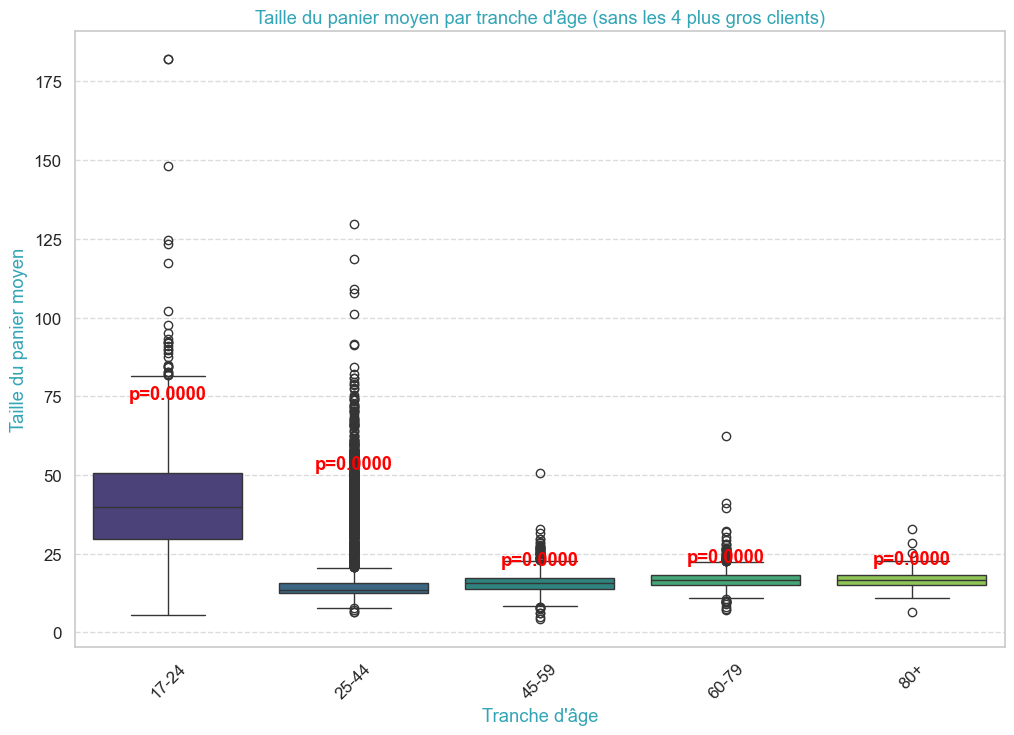

In [119]:
# Créer le boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='basket_size', data=basket_size_by_age, order=labels, palette='viridis')

# Ajouter des annotations pour les résultats de Shapiro-Wilk
for i, age_group in enumerate(labels):
    stat = shapiro_results[age_group]['Statistique']
    p_value = shapiro_results[age_group]['P-value']
    color = 'red' if p_value < 0.05 else 'green'
    plt.text(i, basket_size_by_age[basket_size_by_age['age_group'] == age_group]['basket_size'].quantile(0.95) * 1.05,
             f"p={p_value:.4f}", ha='center', color=color, fontweight='bold')

plt.title('Taille du panier moyen par tranche d\'âge (sans les 4 plus gros clients)', color=(51/255, 165/255, 182/255))
plt.xlabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Taille du panier moyen', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Les clients de la tranche 17-24 ont une taille de panier moyen significativement plus élevée que toutes les autres tranches d'âge. Les tranches 60-79 et 80+ ont des tailles de panier moyen similaires

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\1359119676.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='basket_size', data=avg_basket_size_by_age, order=labels, palette='viridis', ci=None)
C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\1359119676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='basket_size', data=avg_basket_size_by_age, order=labels, palette='viridis', ci=None)


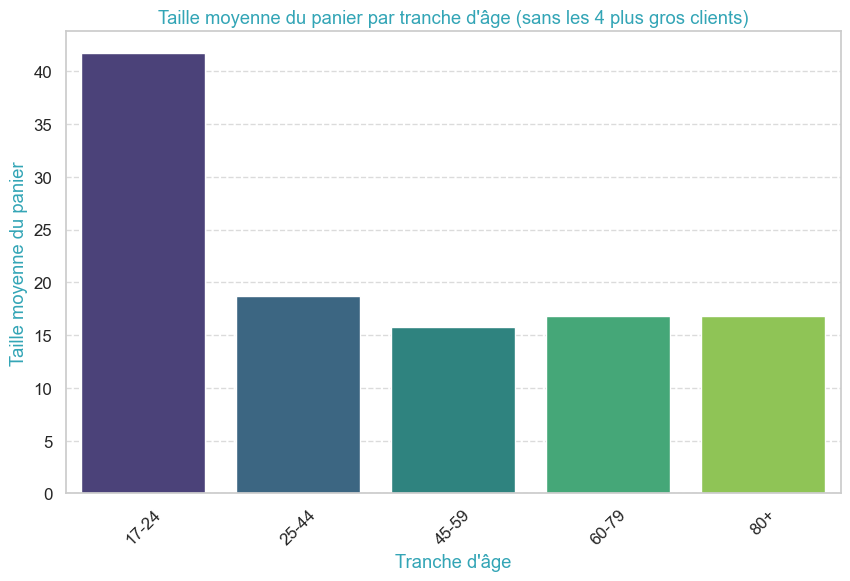

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='basket_size', data=avg_basket_size_by_age, order=labels, palette='viridis', ci=None)

plt.title('Taille moyenne du panier par tranche d\'âge (sans les 4 plus gros clients)', color=(51/255, 165/255, 182/255))
plt.xlabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Taille moyenne du panier', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">le lien entre l'âge des clients et la catégorie des livres achetés.</h3>
</div>

# Visualisation

In [ ]:
# Exclure les 4 plus gros clients
top_4_clients = df_final.groupby('client_id')['price'].sum().sort_values(ascending=False).head(4).index
filtered_df = df_final[~df_final['client_id'].isin(top_4_clients)]

# Créer la table de contingence
contingency_table = pd.crosstab(filtered_df['age_group'], filtered_df['categ'])
print("Table de contingence :")
print(contingency_table)

Table de contingence :
categ           0      1      2
age_group                      
17-24        8602  15298  15320
25-44      250374  87516   9665
45-59       89109  65208   1011
60-79       32079  41993    678
80+          3250   4218     80


# recherche
+ H0: Il n'y a pas de lien entre l'âge des clients et la catégorie des livres achetés,
+ H1: y a un lien entre l'âge des clients et la catégorie des livres achetés

In [127]:
from scipy.stats import chi2_contingency
# Effectuer le test du chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nStatistique du chi-carré : {chi2:.4f}")
print(f"P-value : {p_value:.4f}")
print(f"Degrés de liberté : {dof}")



Statistique du chi-carré : 163640.1800
P-value : 0.0000
Degrés de liberté : 8


+ p-value = 0, il existe un lien significatif entre äge et catégories de livres achetés
+ On rejète H0
+ Mesure de la force de l'association : test de Kramer

In [128]:
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, c = contingency_table.shape
phi2corr = max(0, phi2 - ((r-1)*(c-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
c_corr = c - ((c-1)**2)/(n-1)
cramer_v = np.sqrt(phi2corr / min((r_corr-1), (c_corr-1)))

print(f"\nV de Cramer : {cramer_v:.3f}")


V de Cramer : 0.362


+ effet modéré

<Figure size 1200x800 with 0 Axes>

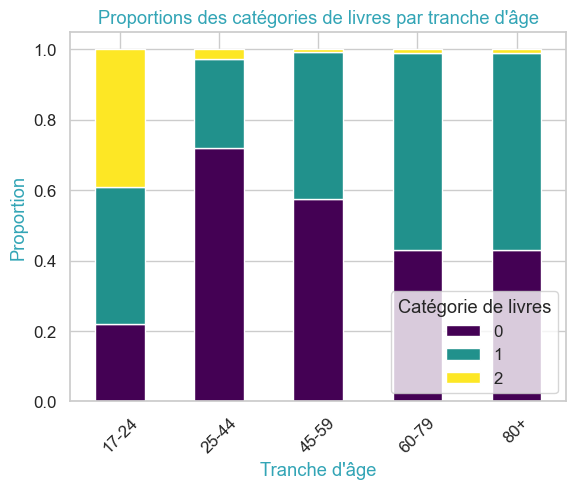

In [130]:
# Normaliser les données pour obtenir des proportions
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
contingency_table_norm.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportions des catégories de livres par tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.xlabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.ylabel('Proportion', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.legend(title='Catégorie de livres')
plt.show()


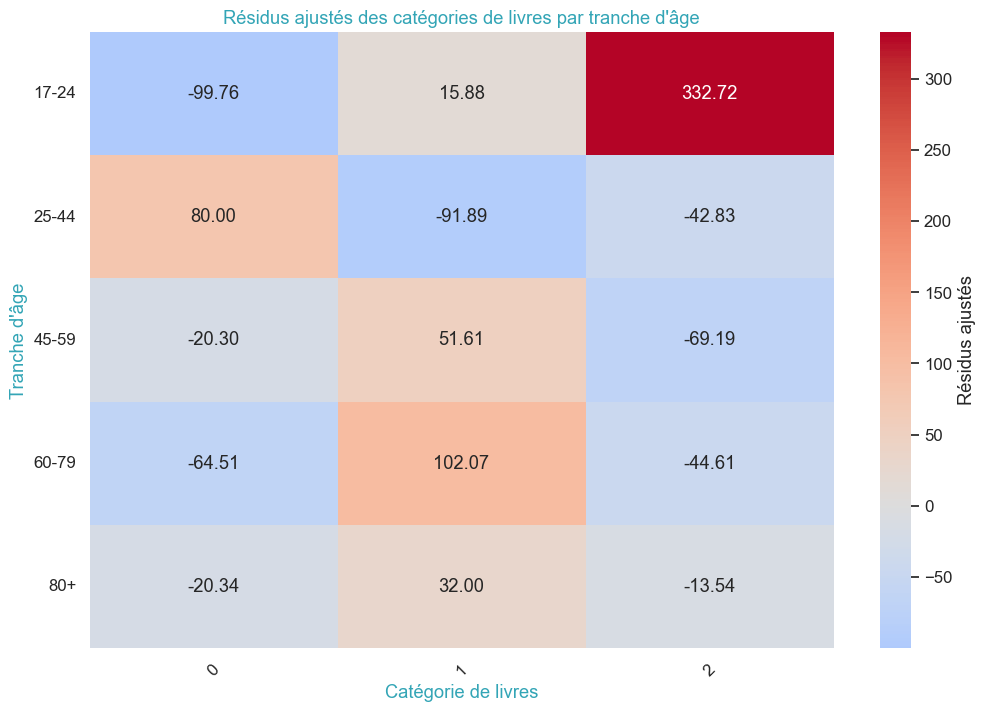

In [131]:
# Calculer les résidus ajustés
residuals = (contingency_table - expected) / np.sqrt(expected)

plt.figure(figsize=(12, 8))
sns.heatmap(residuals, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Résidus ajustés'})
plt.title('Résidus ajustés des catégories de livres par tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.xlabel('Catégorie de livres', color=(51/255, 165/255, 182/255))
plt.ylabel('Tranche d\'âge', color=(51/255, 165/255, 182/255))
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


#pyramide des âges

C:\Users\1340MAD\AppData\Local\Temp\ipykernel_21560\3782331169.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution_by_sex = df_customers.groupby(['pyramide', 'sex']).size().unstack()


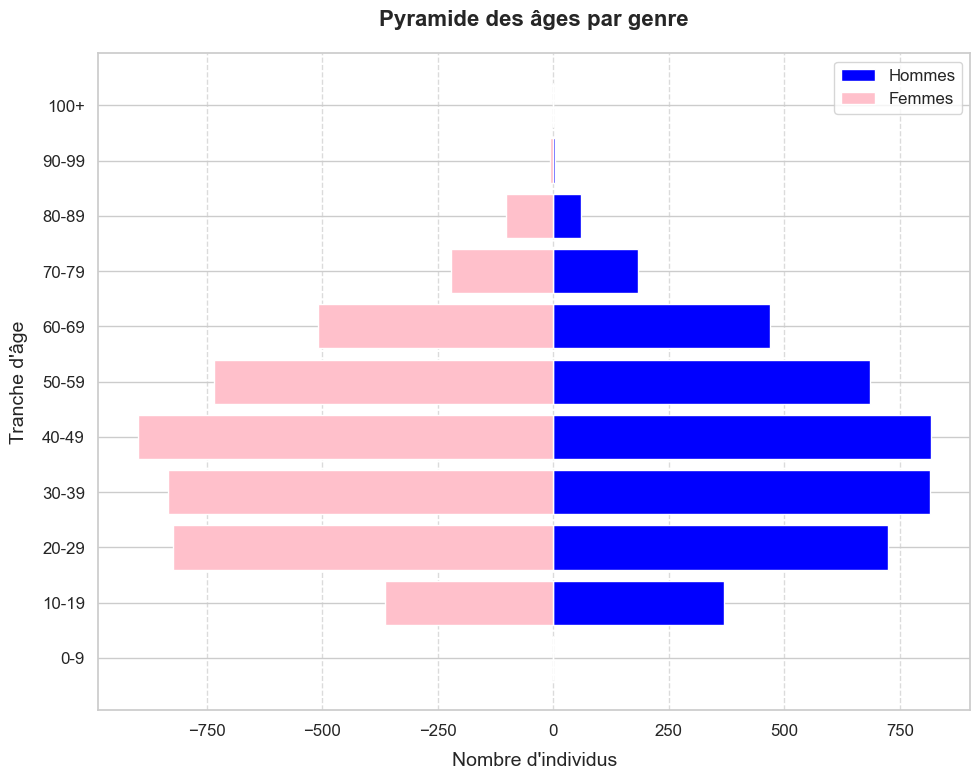

In [156]:
# Créer des tranches d'âge
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df_customers['pyramide'] = pd.cut(df_customers['age'], bins=bins, labels=labels, right=False)

# Compter le nombre d'individus dans chaque tranche d'âge par genre
age_distribution_by_sex = df_customers.groupby(['pyramide', 'sex']).size().unstack()

plt.figure(figsize=(10, 8))

# Tracer les barres horizontales pour chaque genre
plt.barh(age_distribution_by_sex.index, age_distribution_by_sex['m'], color='blue', label='Hommes')
plt.barh(age_distribution_by_sex.index, -age_distribution_by_sex['f'], color='pink', label='Femmes')

plt.title('Pyramide des âges par genre', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Nombre d\'individus', fontsize=14, labelpad=10)
plt.ylabel('Tranche d\'âge', fontsize=14, labelpad=10)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
